In [7]:
library(ggplot2)
library(dplyr)
library(readxl)
library(lubridate)
library(RColorBrewer)
library(zoo)
library(data.table)
library(lares)
library(psych)
library(skimr)


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin



Attaching package: ‘dplyr’


The following object is masked from ‘package:randomForest’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


The foll

INTRODUCTION





The aim of this homework is to compare the performance of nearest neighbor approaches, decision trees and tree-based ensembles. 

1. ACADEMIC SUCCESS DATA SET
-Multi-class


Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,⋯,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,17,5,171,1,1,122.0,1,19,12,⋯,0,0,0,0,0.00000,0,10.8,1.4,1.74,Dropout
1,15,1,9254,1,1,160.0,1,1,3,⋯,0,6,6,6,13.66667,0,13.9,-0.3,0.79,Graduate
1,1,5,9070,1,1,122.0,1,37,37,⋯,0,6,0,0,0.00000,0,10.8,1.4,1.74,Dropout
1,17,2,9773,1,1,122.0,1,38,37,⋯,0,6,10,5,12.40000,0,9.4,-0.8,-3.12,Graduate
2,39,1,8014,0,1,100.0,1,37,38,⋯,0,6,6,6,13.00000,0,13.9,-0.3,0.79,Graduate
2,39,1,9991,0,19,133.1,1,37,37,⋯,0,5,17,5,11.50000,5,16.2,0.3,-0.92,Graduate


Dropout Enrolled Graduate 
    1421      794     2209

[1] 4424

[1] 3082

[1] 1342

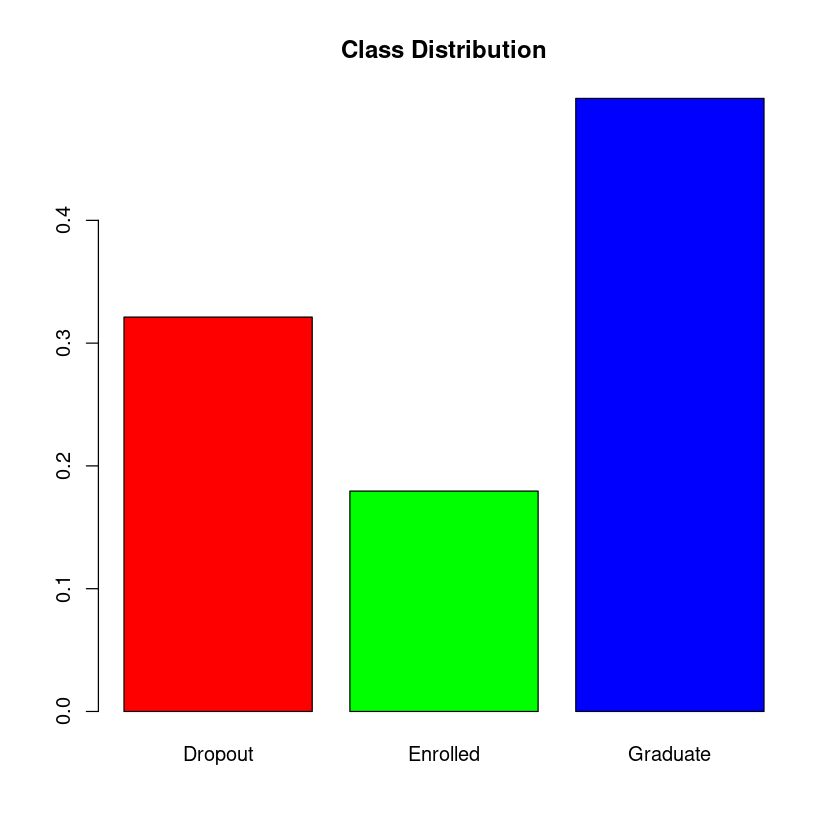

In [8]:


data_path='/home/omery/Desktop/hw2_data/academic_success.csv'
data_academic=fread(data_path)
head(data_academic)

data_academic$Target <- as.factor(data_academic$Target) 
summary(data_academic$Target)

barplot(prop.table(table(data_academic$Target)),
        col=rainbow(3),
        main = "Class Distribution")

#make this example reproducible
set.seed(1)

#use 70% of dataset as training set and 30% as test set
sample <- sample(c(TRUE, FALSE), nrow(data_academic), replace=TRUE, prob=c(0.7,0.3))
data_academic_train  <- data_academic[sample, ]
data_academic_test   <- data_academic[!sample, ]

nrow(data_academic)
nrow(data_academic_train)
nrow(data_academic_test)


In [9]:
str(data_academic)

Classes ‘data.table’ and 'data.frame':	4424 obs. of  37 variables:
 $ Marital status                                : int  1 1 1 1 2 2 1 1 1 1 ...
 $ Application mode                              : int  17 15 1 17 39 39 1 18 1 1 ...
 $ Application order                             : int  5 1 5 2 1 1 1 4 3 1 ...
 $ Course                                        : int  171 9254 9070 9773 8014 9991 9500 9254 9238 9238 ...
 $ Daytime/evening attendance	                  : int  1 1 1 1 0 0 1 1 1 1 ...
 $ Previous qualification                        : int  1 1 1 1 1 19 1 1 1 1 ...
 $ Previous qualification (grade)                : num  122 160 122 122 100 ...
 $ Nacionality                                   : int  1 1 1 1 1 1 1 1 62 1 ...
 $ Mother's qualification                        : int  19 1 37 38 37 37 19 37 1 1 ...
 $ Father's qualification                        : int  12 3 37 37 38 37 38 37 1 19 ...
 $ Mother's occupation                           : int  5 3 9 5 9 9 7 9 9 4 ...
 $

2. COMMUNITIES AND CRIME DATA SET
-Regression Problem (estimating the probability of crime)
-Class Imbalance
-More than 100 features


state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,⋯,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,⋯,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,⋯,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,⋯,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,⋯,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,⋯,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,⋯,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14


population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,⋯,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,is_high_crime
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,⋯,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0
0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,⋯,0.02,0.12,0.45,?,?,?,?,0.00,?,1
0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,⋯,0.01,0.21,0.02,?,?,?,?,0.00,?,0
0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,⋯,0.02,0.39,0.28,?,?,?,?,0.00,?,0
0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,⋯,0.04,0.09,0.02,?,?,?,?,0.00,?,0
0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,⋯,0.01,0.58,0.10,?,?,?,?,0.00,?,0
0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,⋯,0.05,0.08,0.06,?,?,?,?,0.00,?,0
0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,⋯,0.01,0.33,0.00,?,?,?,?,0.00,?,1
0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,⋯,0.04,0.17,0.04,?,?,?,?,0.00,?,1


0    1 
1717  277

[1] "OtherPerCap"          "LemasSwornFT"         "LemasSwFTPerPop"     
 [4] "LemasSwFTFieldOps"    "LemasSwFTFieldPerPop" "LemasTotalReq"       
 [7] "LemasTotReqPerPop"    "PolicReqPerOffic"     "PolicPerPop"         
[10] "RacialMatchCommPol"   "PctPolicWhite"        "PctPolicBlack"       
[13] "PctPolicHisp"         "PctPolicAsian"        "PctPolicMinor"       
[16] "OfficAssgnDrugUnits"  "NumKindsDrugsSeiz"    "PolicAveOTWorked"    
[19] "PolicCars"            "PolicOperBudg"        "LemasPctPolicOnPatr" 
[22] "LemasGangUnitDeploy"  "PolicBudgPerPop"

[1] 23

OtherPerCap,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,⋯,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.36,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,⋯,0.1,0.07,0.02,0.57,0.29,0.06,0.04,0.9,0.5,0.14
0.22,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0.28,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0.36,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0.51,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
0.48,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


  OtherPerCap      LemasSwornFT    LemasSwFTPerPop  LemasSwFTFieldOps
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   
 1st Qu.:0.1700   1st Qu.:0.0100   1st Qu.:0.1300   1st Qu.:0.9300   
 Median :0.2500   Median :0.0200   Median :0.1800   Median :0.9700   
 Mean   :0.2847   Mean   :0.0697   Mean   :0.2175   Mean   :0.9247   
 3rd Qu.:0.3600   3rd Qu.:0.0600   3rd Qu.:0.2500   3rd Qu.:0.9800   
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   
 NA's   :1        NA's   :1675     NA's   :1675     NA's   :1675     
 LemasSwFTFieldPerPop LemasTotalReq   LemasTotReqPerPop PolicReqPerOffic
 Min.   :0.0000       Min.   :0.000   Min.   :0.0000    Min.   :0.0000  
 1st Qu.:0.1600       1st Qu.:0.020   1st Qu.:0.1200    1st Qu.:0.2200  
 Median :0.2100       Median :0.040   Median :0.1700    Median :0.2900  
 Mean   :0.2463       Mean   :0.098   Mean   :0.2152    Mean   :0.3436  
 3rd Qu.:0.2900       3rd Qu.:0.085   3rd Qu.:0.2500    3rd Qu.:0.4350  
 M

Classes ‘data.table’ and 'data.frame':	1994 obs. of  101 variables:
 $ population           : num  0.19 0 0 0.04 0.01 0.02 0.01 0.01 0.03 0.01 ...
 $ householdsize        : num  0.33 0.16 0.42 0.77 0.55 0.28 0.39 0.74 0.34 0.4 ...
 $ racepctblack         : num  0.02 0.12 0.49 1 0.02 0.06 0 0.03 0.2 0.06 ...
 $ racePctWhite         : num  0.9 0.74 0.56 0.08 0.95 0.54 0.98 0.46 0.84 0.87 ...
 $ racePctAsian         : num  0.12 0.45 0.17 0.12 0.09 1 0.06 0.2 0.02 0.3 ...
 $ racePctHisp          : num  0.17 0.07 0.04 0.1 0.05 0.25 0.02 1 0 0.03 ...
 $ agePct12t21          : num  0.34 0.26 0.39 0.51 0.38 0.31 0.3 0.52 0.38 0.9 ...
 $ agePct12t29          : num  0.47 0.59 0.47 0.5 0.38 0.48 0.37 0.55 0.45 0.82 ...
 $ agePct16t24          : num  0.29 0.35 0.28 0.34 0.23 0.27 0.23 0.36 0.28 0.8 ...
 $ agePct65up           : num  0.32 0.27 0.32 0.21 0.36 0.37 0.6 0.35 0.48 0.39 ...
 $ numbUrban            : num  0.2 0.02 0 0.06 0.02 0.04 0.02 0 0.04 0.02 ...
 $ pctUrban             : num  1 1 0

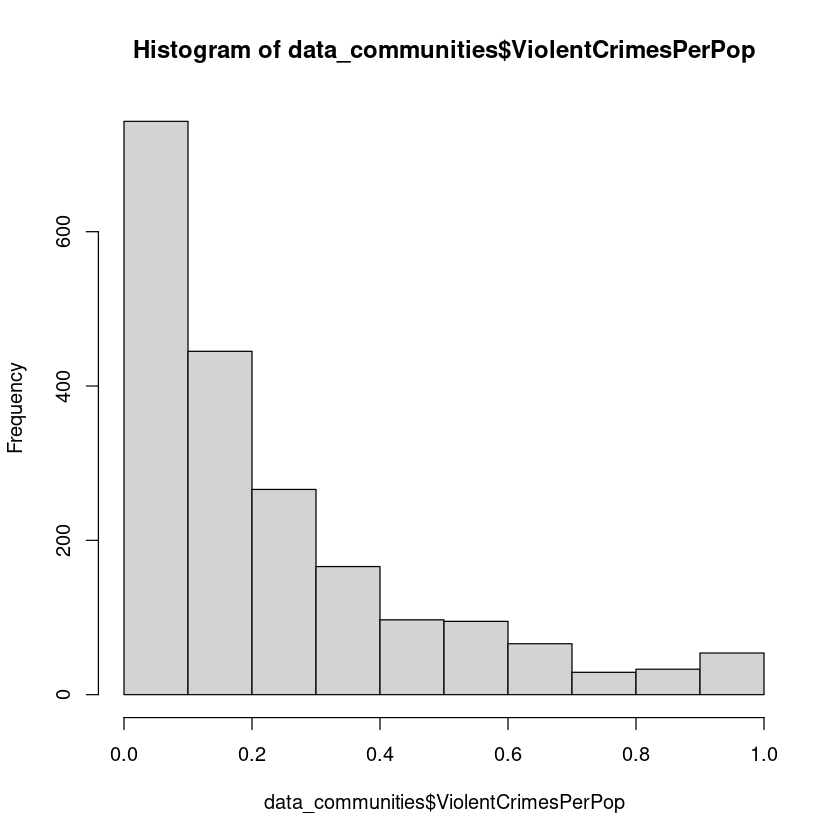

[1] 1994

[1] 1390

[1] 604

[1] "integer"

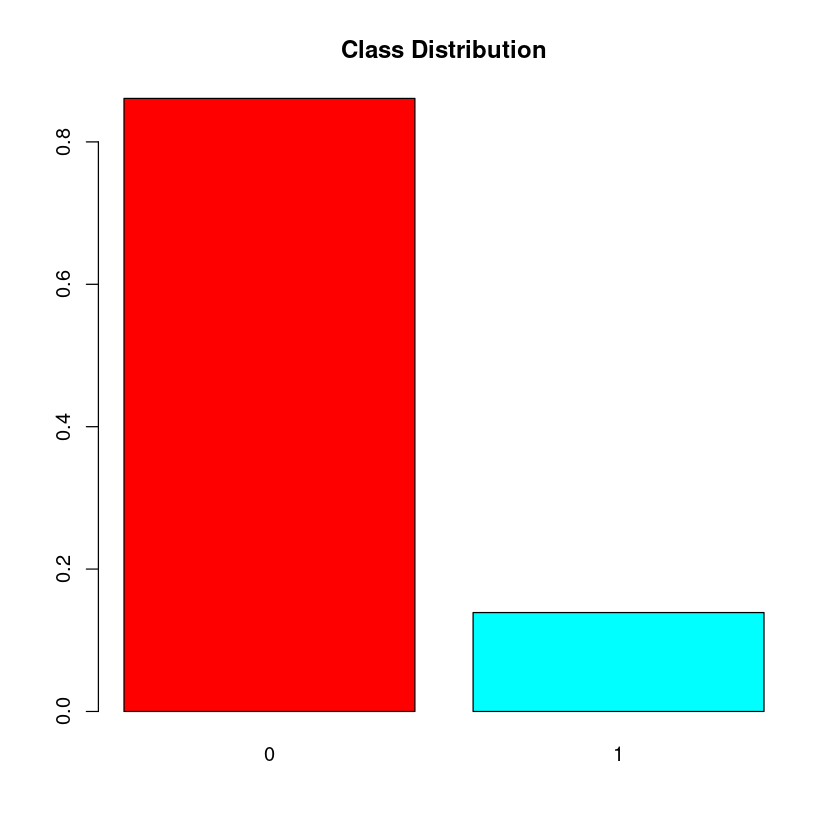

In [10]:
data_path='/home/omery/Desktop/hw2_data/communities/communities.data'
feat_names_path='/home/omery/Desktop/hw2_data/communities/attributes.csv'
data_communities=fread(data_path)
feat_names=fread(feat_names_path,header=F)


names(data_communities)=feat_names$V1
head(data_communities)
hist(data_communities$ViolentCrimesPerPop)

#non-predictive features, just some identification
data_communities <- data_communities[, c('state','county',
                          'community','communityname',
                          'fold'):=NULL]

classification_data=copy(data_communities)
classification_data[,is_high_crime:=as.numeric(ViolentCrimesPerPop>0.5)]
classification_data[,ViolentCrimesPerPop:=NULL]
head(classification_data,10)

classification_data$is_high_crime <- as.factor(classification_data$is_high_crime) 
summary(classification_data$is_high_crime)



# find elements
idx <- classification_data == "?"
# replace elements with NA
is.na(classification_data) <- idx




missing_features <- names(classification_data)[colSums(is.na(classification_data)) > 0]
missing_features
length(missing_features)
# typeof(c(missing_features))
# classification_data[missing_features]



temp<-as.data.frame(classification_data)
temp[c(missing_features)] <- sapply(temp[c(missing_features)], as.numeric)
head(as.data.table(temp[c(missing_features)]))
summary(as.data.table(temp[c(missing_features)]))

#we can omit these features except OtherPerCap since they include too many NA values,
#        we dont have to fill that 1 NA point in OtherPerCap since we are using Tree based learners

temp[is.na(temp)] <- 0


missing_features <- missing_features[ !missing_features == 'OtherPerCap']

temp <- as.data.table(temp)

temp <- temp[, c(missing_features):=NULL]

classification_data<-temp

classification_data$is_high_crime <- as.factor(classification_data$is_high_crime) 

str(classification_data)

barplot(prop.table(table(classification_data$is_high_crime)),
        col = rainbow(2),
        main = "Class Distribution")

#make this example reproducible
set.seed(1)

#use 70% of dataset as training set and 30% as test set
sample <- sample(c(TRUE, FALSE), nrow(classification_data), replace=TRUE, prob=c(0.7,0.3))
data_communities_train  <- classification_data[sample, ]
data_communities_test   <- classification_data[!sample, ]

nrow(classification_data)
nrow(data_communities_train)
nrow(data_communities_test)

typeof(classification_data$is_high_crime)


3. MUSHROOM DATA SET
-Categorical Features

p,x,s,n,t,p.1,f,c,n.1,k,⋯,s,w,w.1,p,w.2,o,p.1,k,s.1,u
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
e,x,s,y,t,a,f,c,b,k,⋯,s,w,w,p,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,⋯,s,w,w,p,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,⋯,s,w,w,p,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,⋯,s,w,w,p,w,o,e,n,a,g
e,x,y,y,t,a,f,c,b,n,⋯,s,w,w,p,w,o,p,k,n,g
e,b,s,w,t,a,f,c,b,g,⋯,s,w,w,p,w,o,p,k,n,m


e    p 
4208 3915

Classes ‘data.table’ and 'data.frame':	8123 obs. of  23 variables:
 $ p: Factor w/ 2 levels "e","p": 1 1 2 1 1 1 1 2 1 1 ...
 $ x: chr  "x" "b" "x" "x" ...
 $ s: chr  "s" "s" "y" "s" ...
 $ n: chr  "y" "w" "w" "g" ...
 $ t: chr  "t" "t" "t" "f" ...
 $ p: chr  "a" "l" "p" "n" ...
 $ f: chr  "f" "f" "f" "f" ...
 $ c: chr  "c" "c" "c" "w" ...
 $ n: chr  "b" "b" "n" "b" ...
 $ k: chr  "k" "n" "n" "k" ...
 $ e: chr  "e" "e" "e" "t" ...
 $ e: chr  "c" "c" "e" "e" ...
 $ s: chr  "s" "s" "s" "s" ...
 $ s: chr  "s" "s" "s" "s" ...
 $ w: chr  "w" "w" "w" "w" ...
 $ w: chr  "w" "w" "w" "w" ...
 $ p: chr  "p" "p" "p" "p" ...
 $ w: chr  "w" "w" "w" "w" ...
 $ o: chr  "o" "o" "o" "o" ...
 $ p: chr  "p" "p" "p" "e" ...
 $ k: chr  "n" "n" "k" "n" ...
 $ s: chr  "n" "n" "s" "a" ...
 $ u: chr  "g" "m" "u" "g" ...
 - attr(*, ".internal.selfref")=<externalptr> 
'data.frame':	8123 obs. of  23 variables:
 $ p  : Factor w/ 2 levels "e","p": 1 1 2 1 1 1 1 2 1 1 ...
 $ x  : Factor w/ 6 levels "b","c","f","k",.

[1] 8123

[1] 5656

[1] 2467

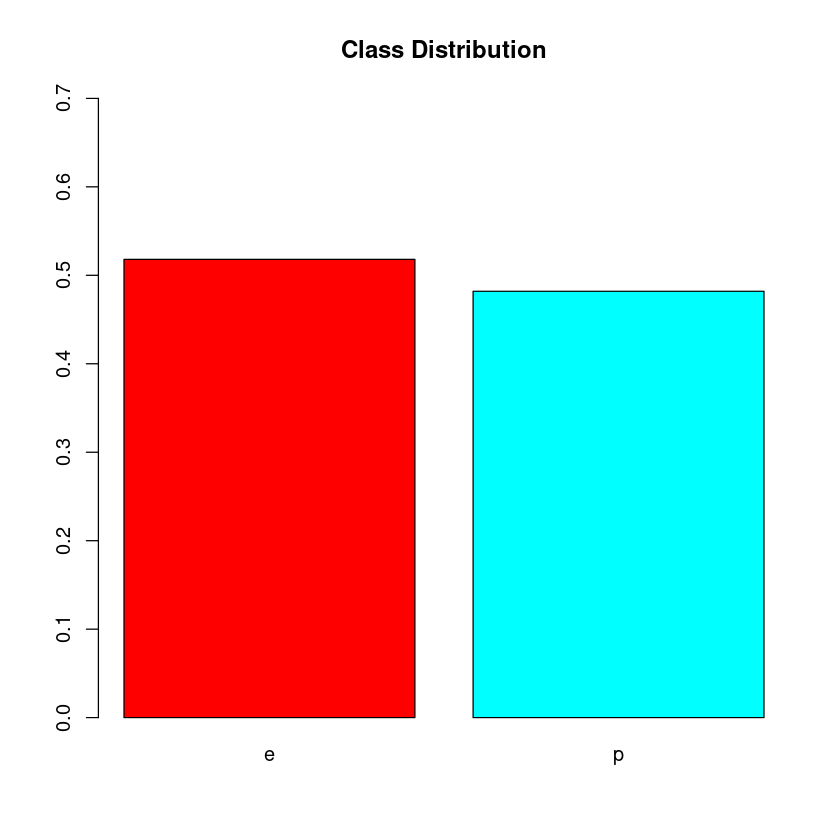

In [11]:
data_path='/home/omery/Desktop/hw2_data/mushroom/agaricus-lepiota.data'
data_mushroom=fread(data_path)
head(data_mushroom)
data_mushroom$p <- as.factor(data_mushroom$p) 
summary(data_mushroom$p)

str(data_mushroom)


data_mushroom <- as.data.frame(unclass(data_mushroom),stringsAsFactors=TRUE)
str(data_mushroom)


data_mushroom <- as.data.table(data_mushroom)

data_mushroom <- (data_mushroom[,p.2:=NULL])


barplot(prop.table(table(data_mushroom$p)),
        col = rainbow(2),
        ylim = c(0, 0.7),
        main = "Class Distribution")

#make this example reproducible
set.seed(1)

#use 70% of dataset as training set and 30% as test set
sample <- sample(c(TRUE, FALSE), nrow(data_mushroom), replace=TRUE, prob=c(0.7,0.3))
data_mushroom_train  <- data_mushroom[sample, ]
data_mushroom_test   <- data_mushroom[!sample, ]

nrow(data_mushroom)
nrow(data_mushroom_train)
nrow(data_mushroom_test)


4. PARKINSONS DISEASE AND SPEECH FEATURES DATA SET
-More than 100 features
-Class Imbalance

id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,⋯,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,1,0.85247,0.71826,0.57227,240,239,0.008063530,0.000086800,0.00218,⋯,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
0,1,0.76686,0.69481,0.53966,234,233,0.008258256,0.000073100,0.00195,⋯,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
0,1,0.85083,0.67604,0.58982,232,231,0.008339590,0.000060400,0.00176,⋯,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,⋯,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
1,0,0.32790,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,⋯,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
1,0,0.50780,0.78744,0.65451,226,221,0.007631204,0.002696381,0.00783,⋯,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.2250,1


0   1 
192 564

'data.frame':	756 obs. of  754 variables:
 $ gender                        : int  1 1 1 0 0 0 1 1 1 0 ...
 $ PPE                           : num  0.852 0.767 0.851 0.411 0.328 ...
 $ DFA                           : num  0.718 0.695 0.676 0.797 0.798 ...
 $ RPDE                          : num  0.572 0.54 0.59 0.593 0.53 ...
 $ numPulses                     : int  240 234 232 178 236 226 322 318 318 493 ...
 $ numPeriodsPulses              : int  239 233 231 177 235 221 321 317 317 492 ...
 $ meanPeriodPulses              : num  0.00806 0.00826 0.00834 0.01086 0.00816 ...
 $ stdDevPeriodPulses            : num  8.68e-05 7.31e-05 6.04e-05 1.83e-04 2.67e-03 ...
 $ locPctJitter                  : num  0.00218 0.00195 0.00176 0.00419 0.00535 0.00783 0.00222 0.00282 0.00161 0.00075 ...
 $ locAbsJitter                  : num  1.76e-05 1.61e-05 1.47e-05 4.55e-05 4.37e-05 5.97e-05 1.33e-05 1.71e-05 9.73e-06 2.93e-06 ...
 $ rapJitter                     : num  0.00067 0.00052 0.00057 0.00149 0.00

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,⋯,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,0.85247,0.71826,0.57227,240,239,0.008063530,0.000086800,0.00218,0.000017600,⋯,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,1,0.76686,0.69481,0.53966,234,233,0.008258256,0.000073100,0.00195,0.000016100,⋯,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
3,1,0.85083,0.67604,0.58982,232,231,0.008339590,0.000060400,0.00176,0.000014700,⋯,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,0.000045500,⋯,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
5,0,0.32790,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,0.000043700,⋯,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
6,0,0.50780,0.78744,0.65451,226,221,0.007631204,0.002696381,0.00783,0.000059700,⋯,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.2250,1
7,1,0.76095,0.62145,0.54543,322,321,0.005990989,0.000107266,0.00222,0.000013300,⋯,117.2678,75.3156,32.0478,7.7060,3.1060,4.6206,12.8353,13.8300,7.7693,1
8,1,0.83671,0.62079,0.51179,318,317,0.006073855,0.000135739,0.00282,0.000017100,⋯,3.8564,11.8909,7.2891,4.3682,3.6443,5.9610,11.7552,18.0927,5.0448,1
9,1,0.80826,0.61766,0.50447,318,317,0.006057188,0.000069300,0.00161,0.000009730,⋯,2.2640,6.3993,4.4165,4.2662,3.6357,3.7346,2.9394,3.6216,3.8430,1


[1] 756

[1] 532

[1] 224

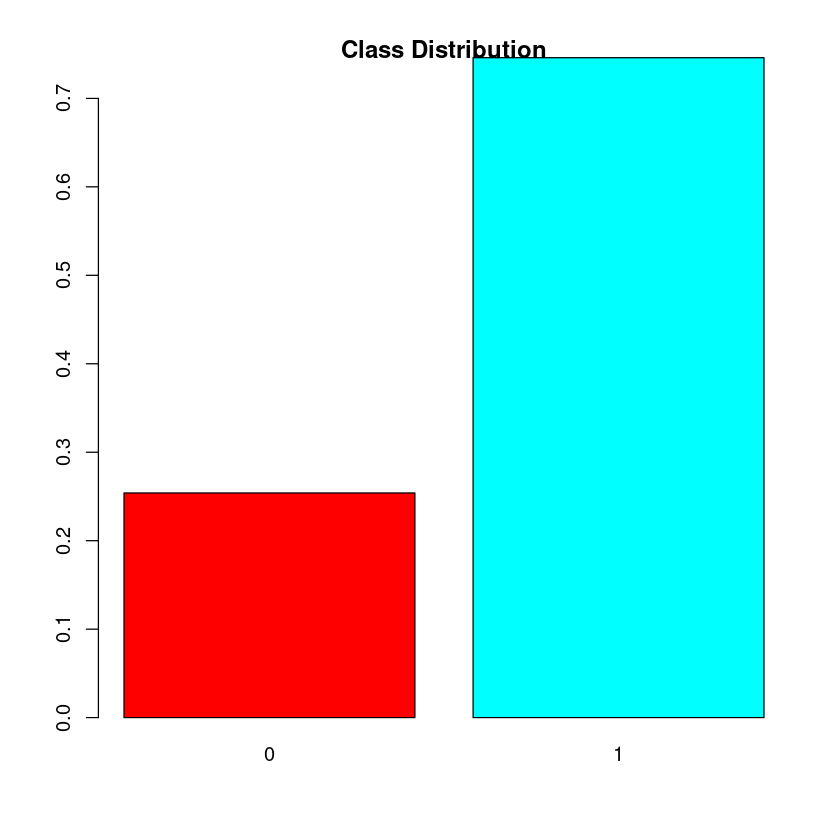

In [12]:
data_path='/home/omery/Desktop/hw2_data/parkinson+s+disease+classification/pd_speech_features.csv'
data_pd=fread(data_path)
head(data_pd)
data_pd$class <- as.factor(data_pd$class) 
summary(data_pd$class)

data_pd <- data_pd[,id:=NULL]

data_pd <- as.data.frame(unclass(data_pd),stringsAsFactors=TRUE)
str(data_pd)

#remove rows with missing values 
data_pd <- na.omit(data_pd)

#convert all character variables to factor variables
library(dplyr)
data_pd %>% mutate_if(is.character, as.factor)


data_pd <- as.data.table(data_pd)
data_pd[is.na(data_pd)] <- 0


barplot(prop.table(table(data_pd$class)),
        col = rainbow(2),
        ylim = c(0, 0.7),
        main = "Class Distribution")

#make this example reproducible
set.seed(1)

#use 70% of dataset as training set and 30% as test set
sample <- sample(c(TRUE, FALSE), nrow(data_pd), replace=TRUE, prob=c(0.7,0.3))
data_pd_train  <- data_pd[sample, ]
data_pd_test   <- data_pd[!sample, ]

nrow(data_pd)
nrow(data_pd_train)
nrow(data_pd_test)


5. DIGIT RECOGNITION DATA SET
-Multi-class


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V56,V57,V58,V59,V60,V61,V62,V63,V64,class
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,6,15,12,1,0,0,0,7,⋯,0,0,0,6,14,7,1,0,0,0
0,0,10,16,6,0,0,0,0,7,⋯,0,0,0,10,16,15,3,0,0,0
0,0,8,15,16,13,0,0,0,1,⋯,0,0,0,9,14,0,0,0,0,7
0,0,0,3,11,16,0,0,0,0,⋯,0,0,0,0,1,15,2,0,0,4
0,0,5,14,4,0,0,0,0,0,⋯,0,0,0,4,12,14,7,0,0,6
0,0,11,16,10,1,0,0,0,4,⋯,3,0,0,10,16,16,16,16,6,2


0   1   2   3   4   5   6   7   8   9 
376 389 380 389 387 376 377 387 380 382

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V56,V57,V58,V59,V60,V61,V62,V63,V64,class
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,5,13,9,1,0,0,0,0,⋯,0,0,0,6,13,10,0,0,0,0
0,0,0,12,13,5,0,0,0,0,⋯,0,0,0,0,11,16,10,0,0,1
0,0,0,4,15,12,0,0,0,0,⋯,0,0,0,0,3,11,16,9,0,2
0,0,7,15,13,1,0,0,0,8,⋯,0,0,0,7,13,13,9,0,0,3
0,0,0,1,11,0,0,0,0,0,⋯,0,0,0,0,2,16,4,0,0,4
0,0,12,10,0,0,0,0,0,0,⋯,0,0,0,9,16,16,10,0,0,5


0   1   2   3   4   5   6   7   8   9 
178 182 177 183 181 182 181 179 174 180

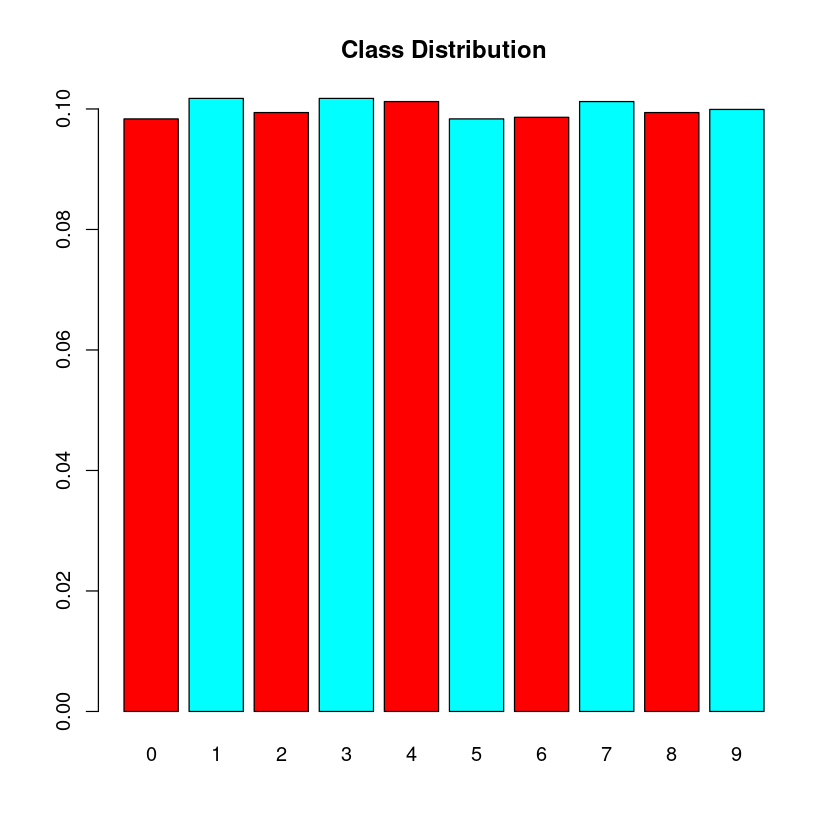

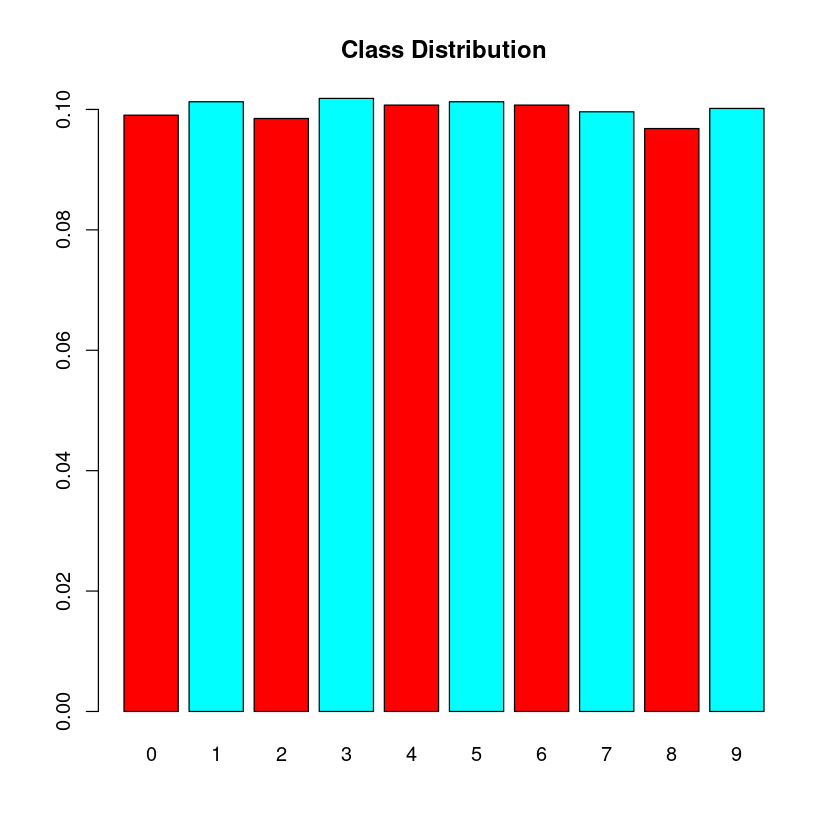

In [13]:
#TRAINING DATA

data_path='/home/omery/Desktop/hw2_data/optical+recognition+of+handwritten+digits/optdigits.tra'
data_digits_train=fread(data_path)
colnames(data_digits_train)[65] <- "class"
head(data_digits_train)

data_digits_train$class <- as.factor(data_digits_train$class) 
summary(data_digits_train$class)

barplot(prop.table(table(data_digits_train$class)),
        col = rainbow(2),
        main = "Class Distribution")

#TEST DATA

data_path='/home/omery/Desktop/hw2_data/optical+recognition+of+handwritten+digits/optdigits.tes'
data_digits_test=fread(data_path)
colnames(data_digits_test)[65] <- "class"
head(data_digits_test)

data_digits_test$class <- as.factor(data_digits_test$class) 
summary(data_digits_test$class)

barplot(prop.table(table(data_digits_test$class)),
        col = rainbow(2),
        main = "Class Distribution")

IMPLEMENTATIONS
a. Nearest Neighbor (NN) 
b. Decision Trees (DT)
c. Random Forests (RF)
d. Gradient Boosted Trees (GBT)

In [14]:

# Loading package 
library(e1071) 
library(caTools) 
library(class) 
  


Attaching package: ‘e1071’


The following object is masked from ‘package:lares’:

    impute




a1. Nearest Neighbor (NN) for Academic Success Data Set

In [15]:

data_academic_train <- data_academic_train %>%
  select(Target, everything())

data_academic_test <- data_academic_test %>%
  select(Target, everything())

head(data_academic_train)
head(data_academic_test)


# Feature Scaling 
train_scale <- scale(data_academic_train[, -1]) 
test_scale <- scale(data_academic_test[, -1]) 
  
# Fitting KNN Model  
# to training dataset 
classifier_knn <- knn(train = train_scale, 
                      test = test_scale, 
                      cl = data_academic_train$Target, 
                      k = 1) 
classifier_knn 
  
# Confusiin Matrix 
cm <- table(data_academic_test$Target, classifier_knn) 
cm 
  
# Model Evaluation - Choosing K 
# Calculate out of Sample error 
misClassError <- mean(classifier_knn != data_academic_test$Target) 
print(paste('Accuracy =', 1-misClassError)) 
  
accuracy <- 0 
accuracy_new <- 0
i <- 2
while(accuracy_new>=accuracy){
  accuracy <- accuracy_new
  classifier_knn <- knn(train = train_scale, 
                      test = test_scale, 
                      cl = data_academic_train$Target,  
                      k = i) 
  misClassError <- mean(classifier_knn != data_academic_test$Target) 
  accuracy_new <- 1-misClassError
  print(paste('Accuracy =', 1-misClassError, " k =", i)) 
  i <- i+1
}



Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,⋯,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Dropout,1,17,5,171,1,1,122,1,19,⋯,0,0,0,0,0,0.00000,0,10.8,1.4,1.74
Graduate,1,15,1,9254,1,1,160,1,1,⋯,0,0,6,6,6,13.66667,0,13.9,-0.3,0.79
Dropout,1,1,5,9070,1,1,122,1,37,⋯,0,0,6,0,0,0.00000,0,10.8,1.4,1.74
Graduate,2,39,1,8014,0,1,100,1,37,⋯,0,0,6,6,6,13.00000,0,13.9,-0.3,0.79
Dropout,1,18,4,9254,1,1,119,1,37,⋯,0,0,5,5,0,0.00000,0,15.5,2.8,-4.06
Graduate,1,1,3,9238,1,1,137,62,1,⋯,0,0,6,7,6,14.14286,0,16.2,0.3,-0.92


Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,⋯,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Graduate,1,17,2,9773,1,1,122.0,1,38,⋯,0,0,6,10,5,12.400,0,9.4,-0.8,-3.12
Graduate,2,39,1,9991,0,19,133.1,1,37,⋯,0,0,5,17,5,11.500,5,16.2,0.3,-0.92
Graduate,1,1,1,9500,1,1,142.0,1,19,⋯,0,0,8,8,8,14.345,0,15.5,2.8,-4.06
Graduate,1,1,1,9085,1,1,149.0,1,38,⋯,0,0,5,5,5,12.000,0,10.8,1.4,1.74
Enrolled,1,18,1,9238,1,1,137.0,1,19,⋯,0,0,6,14,2,11.000,0,10.8,1.4,1.74
Graduate,1,17,2,9500,1,1,135.0,1,19,⋯,0,0,8,8,8,14.545,0,15.5,2.8,-4.06


[1] Graduate Graduate Graduate Graduate Enrolled Graduate Graduate Dropout 
   [9] Graduate Graduate Dropout  Enrolled Dropout  Enrolled Enrolled Graduate
  [17] Graduate Graduate Graduate Graduate Graduate Enrolled Dropout  Graduate
  [25] Enrolled Dropout  Enrolled Graduate Dropout  Enrolled Graduate Graduate
  [33] Graduate Graduate Graduate Graduate Enrolled Dropout  Graduate Graduate
  [41] Graduate Graduate Dropout  Graduate Graduate Graduate Graduate Graduate
  [49] Enrolled Graduate Dropout  Graduate Graduate Dropout  Dropout  Dropout 
  [57] Graduate Dropout  Graduate Dropout  Dropout  Enrolled Enrolled Graduate
  [65] Graduate Dropout  Graduate Enrolled Graduate Graduate Graduate Graduate
  [73] Graduate Enrolled Graduate Dropout  Graduate Graduate Graduate Graduate
  [81] Graduate Graduate Graduate Graduate Dropout  Graduate Graduate Graduate
  [89] Graduate Graduate Enrolled Enrolled Graduate Enrolled Dropout  Graduate
  [97] Graduate Enrolled Graduate Graduate Dropout  Graduate Dropout  Graduate
 [105] Graduate Graduate Graduate Graduate Graduate Graduate Dropout  Graduate
 [113] Dropout  Enrolled Graduate Graduate Graduate Graduate Dropout  Graduate
 [121] Enrolled Graduate Graduate Dropout  Enrolled Dropout  Graduate Graduate
 [129] Graduate Graduate Enrolled Graduate Graduate Dropout  Dropout  Graduate
 [137] Graduate Graduate Dropout  Graduate Dropout  Enrolled Graduate Graduate
 [145] Graduate Enrolled Graduate Graduate Graduate Dropout  Dropout  Graduate
 [153] Graduate Graduate Graduate Dropout  Dropout  Dropout  Enrolled Dropout 
 [161] Dropout  Graduate Dropout  Dropout  Enrolled Graduate Graduate Graduate
 [169] Dropout  Dropout  Graduate Graduate Graduate Dropout  Graduate Graduate
 [177] Graduate Dropout  Dropout  Graduate Graduate Dropout  Enrolled Graduate
 [185] Graduate Graduate Graduate Graduate Graduate Dropout  Graduate Dropout 
 [193] Graduate Enrolled Graduate Graduate Dropout  Graduate Dropout  Graduate
 [201] Graduate Graduate Graduate Dropout  Graduate Graduate Graduate Enrolled
 [209] Graduate Enrolled Graduate Dropout  Dropout  Graduate Enrolled Graduate
 [217] Dropout  Graduate Dropout  Graduate Dropout  Dropout  Graduate Graduate
 [225] Enrolled Graduate Graduate Graduate Graduate Graduate Dropout  Graduate
 [233] Graduate Graduate Dropout  Dropout  Graduate Graduate Graduate Graduate
 [241] Graduate Graduate Graduate Enrolled Graduate Graduate Graduate Graduate
 [249] Enrolled Enrolled Graduate Dropout  Dropout  Enrolled Graduate Enrolled
 [257] Dropout  Dropout  Graduate Graduate Graduate Graduate Dropout  Dropout 
 [265] Enrolled Graduate Graduate Dropout  Graduate Dropout  Dropout  Graduate
 [273] Graduate Enrolled Dropout  Graduate Dropout  Graduate Enrolled Graduate
 [281] Graduate Enrolled Enrolled Dropout  Graduate Graduate Graduate Dropout 
 [289] Graduate Graduate Dropout  Enrolled Dropout  Dropout  Graduate Dropout 
 [297] Dropout  Graduate Graduate Enrolled Enrolled Graduate Dropout  Graduate
 [305] Graduate Graduate Enrolled Dropout  Graduate Dropout  Enrolled Graduate
 [313] Dropout  Graduate Graduate Graduate Graduate Enrolled Graduate Graduate
 [321] Dropout  Graduate Enrolled Graduate Enrolled Dropout  Dropout  Enrolled
 [329] Dropout  Graduate Dropout  Graduate Graduate Graduate Graduate Graduate
 [337] Enrolled Graduate Graduate Graduate Graduate Graduate Enrolled Graduate
 [345] Graduate Graduate Graduate Dropout  Enrolled Dropout  Graduate Enrolled
 [353] Graduate Dropout  Graduate Dropout  Graduate Graduate Dropout  Dropout 
 [361] Enrolled Dropout  Dropout  Graduate Graduate Enrolled Graduate Graduate
 [369] Graduate Graduate Graduate Enrolled Dropout  Dropout  Dropout  Graduate
 [377] Dropout  Enrolled Graduate Graduate Graduate Dropout  Graduate Graduate
 [385] Dropout  Dropout  Dropout  Graduate Graduate Graduate Graduate Graduate
 [393] Enrolled Graduate Dropout  Graduate Graduate Dropout  Graduate Dropout 
 [401] Graduate Graduate Graduate Enrolled Graduate D

          classifier_knn
           Dropout Enrolled Graduate
  Dropout      282       63       84
  Enrolled      47       74      114
  Graduate      53      102      523

[1] "Accuracy = 0.654992548435171"
[1] "Accuracy = 0.652011922503726  k = 2"
[1] "Accuracy = 0.68107302533532  k = 3"
[1] "Accuracy = 0.697466467958271  k = 4"
[1] "Accuracy = 0.697466467958271  k = 5"
[1] "Accuracy = 0.699701937406855  k = 6"
[1] "Accuracy = 0.710134128166915  k = 7"
[1] "Accuracy = 0.707153502235469  k = 8"


I did not want to delete the previous part but the further package called "kknn" allows you to change the distance measure and also gives you the besk k value. It uses minkowski distance so the parameter distance = 1 is manhattan and 2 is euclidian.

In [55]:
library("kknn")

fit.kknn <- kknn(Target ~ ., data_academic_train, data_academic_test)
table(data_academic_test$Target, fit.kknn$fit)
(fit.train1 <- train.kknn(Target ~ ., data_academic_train, kmax = 30, 
	kernel = c("triangular", "rectangular", "epanechnikov", "optimal"), distance = 1))
table(predict(fit.train1, data_academic_test), data_academic_test$Target)

fit.kknn <- kknn(Target ~ ., data_academic_train, data_academic_test)
table(data_academic_test$Target, fit.kknn$fit)
(fit.train1 <- train.kknn(Target ~ ., data_academic_train, kmax = 30, 
	kernel = c("triangular", "rectangular", "epanechnikov", "optimal"), distance = 2))
table(predict(fit.train1, data_academic_test), data_academic_test$Target)

          
           Dropout Enrolled Graduate
  Dropout      285       53       91
  Enrolled      41       67      127
  Graduate      36       69      573


Call:
train.kknn(formula = Target ~ ., data = data_academic_train,     kmax = 30, distance = 1, kernel = c("triangular", "rectangular",         "epanechnikov", "optimal"))

Type of response variable: nominal
Minimal misclassification: 0.2780662
Best kernel: rectangular
Best k: 17

          
           Dropout Enrolled Graduate
  Dropout      278       20       11
  Enrolled      39       51       11
  Graduate     112      164      656

          
           Dropout Enrolled Graduate
  Dropout      285       53       91
  Enrolled      41       67      127
  Graduate      36       69      573


Call:
train.kknn(formula = Target ~ ., data = data_academic_train,     kmax = 30, distance = 2, kernel = c("triangular", "rectangular",         "epanechnikov", "optimal"))

Type of response variable: nominal
Minimal misclassification: 0.2916937
Best kernel: triangular
Best k: 28

          
           Dropout Enrolled Graduate
  Dropout      284       28       15
  Enrolled      34       42       16
  Graduate     111      165      647

a2. Nearest Neighbor (NN) for Communities and Crime Data Set

In [ ]:


fit.kknn <- kknn(is_high_crime ~ ., data_communities_train, data_communities_test)

table(data_communities_test$is_high_crime, fit.kknn$fit)
(fit.train1 <- train.kknn(is_high_crime ~ ., data_communities_train, kmax = 30, 
	kernel = c("triangular", "rectangular", "epanechnikov", "optimal"), distance = 1))
table(predict(fit.train1, data_communities_test), data_communities_test$is_high_crime)

fit.kknn <- kknn(is_high_crime ~ ., data_communities_train, data_communities_test)
table(data_communities_test$is_high_crime, fit.kknn$fit)
(fit.train1 <- train.kknn(is_high_crime ~ ., data_communities_train, kmax = 30, 
	kernel = c("triangular", "rectangular", "epanechnikov", "optimal"), distance = 2))
table(predict(fit.train1, data_communities_test), data_communities_test$is_high_crime)

[1] 101

[1] 101

[1] 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1
 [112] 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1
 [186] 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 [297] 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 [445] 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0
 [482] 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 [519] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 [593] 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 [630] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0
 [667] 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 [815] 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 [889] 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 [926] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 [963] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
[1000] 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1037] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
[1074] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
[1111] 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0
[1148] 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
[1185] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
[1222] 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1
[1259] 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0
[1296] 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
[1333] 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
[1370] 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
Levels: 0 1

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1
 [38] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 [75] 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
[112] 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0
[149] 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
[186] 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
[297] 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
[371] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1
[445] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[482] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
[519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
[556] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[593] 0 0 0 1 0 0 0 0 0 0 0 0
Levels: 0 1

[1] 1390

[1] 604

   
      0   1
  0 508  18
  1  42  36


Call:
train.kknn(formula = is_high_crime ~ ., data = data_communities_train,     kmax = 30, distance = 1, kernel = c("triangular", "rectangular",         "epanechnikov", "optimal"))

Type of response variable: nominal
Minimal misclassification: 0.09640288
Best kernel: epanechnikov
Best k: 20

   
      0   1
  0 513  46
  1  13  32

   
      0   1
  0 508  18
  1  42  36


Call:
train.kknn(formula = is_high_crime ~ ., data = data_communities_train,     kmax = 30, distance = 2, kernel = c("triangular", "rectangular",         "epanechnikov", "optimal"))

Type of response variable: nominal
Minimal misclassification: 0.09496403
Best kernel: triangular
Best k: 13

   
      0   1
  0 508  44
  1  18  34

a3. Nearest Neighbor (NN) for Mushroom Data Set

In [ ]:
head(data_mushroom_train)

fit.kknn <- kknn(p ~ ., data_mushroom_train, data_mushroom_test)
table(data_mushroom_test$p, fit.kknn$fit)
(fit.train1 <- train.kknn(p ~ ., data_mushroom_train, kmax = 30, 
	kernel = c("triangular", "rectangular", "epanechnikov", "optimal"), distance = 1))
table(predict(fit.train1, data_mushroom_test), data_mushroom_test$p)

fit.kknn <- kknn(p ~ ., data_mushroom_train, data_mushroom_test)
table(data_mushroom_test$p, fit.kknn$fit)
(fit.train1 <- train.kknn(p ~ ., data_mushroom_train, kmax = 30, 
	kernel = c("triangular", "rectangular", "epanechnikov", "optimal"), distance = 2))
table(predict(fit.train1, data_mushroom_test), data_mushroom_test$p)

p,x,s,n,t,p.1,f,c,n.1,k,⋯,s.1,s.2,w,w.1,w.2,o,p.3,k.1,s.3,u
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
e,x,s,y,t,a,f,c,b,k,⋯,s,s,w,w,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,⋯,s,s,w,w,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,⋯,s,s,w,w,w,o,p,k,s,u
e,x,y,y,t,a,f,c,b,n,⋯,s,s,w,w,w,o,p,k,n,g
p,x,y,w,t,p,f,c,n,p,⋯,s,s,w,w,w,o,p,k,v,g
e,b,s,y,t,a,f,c,b,g,⋯,s,s,w,w,w,o,p,k,s,m


   
       e    p
  e 1254    0
  p    0 1213


Call:
train.kknn(formula = p ~ ., data = data_mushroom_train, kmax = 30,     distance = 1, kernel = c("triangular", "rectangular", "epanechnikov",         "optimal"))

Type of response variable: nominal
Minimal misclassification: 0
Best kernel: triangular
Best k: 1

   
       e    p
  e 1254    0
  p    0 1213

   
       e    p
  e 1254    0
  p    0 1213


Call:
train.kknn(formula = p ~ ., data = data_mushroom_train, kmax = 30,     distance = 1, kernel = c("triangular", "rectangular", "epanechnikov",         "optimal"))

Type of response variable: nominal
Minimal misclassification: 0
Best kernel: triangular
Best k: 1

   
       e    p
  e 1254    0
  p    0 1213

a4. Nearest Neighbor (NN) for Parkinson Set

In [ ]:
head(data_pd_train)
head(data_pd_test)

data_pd_train <- data_pd_train %>%
  select(class, everything())

data_pd_test <- data_pd_test %>%
  select(class, everything())

data_pd_train <- data_pd_train[,1:100] 
data_pd_test <- data_pd_test[,1:100] 

fit.kknn <- kknn(class ~ ., data_pd_train, data_pd_test)
table(data_pd_test$class, fit.kknn$fit)
(fit.train1 <- train.kknn(class ~ ., data_pd_train, kmax = 30, 
	kernel = c("triangular", "rectangular", "epanechnikov", "optimal"), distance = 1))
table(predict(fit.train1, data_pd_test), data_pd_test$class)

fit.kknn <- kknn(class ~ ., data_pd_train, data_pd_test)
table(data_pd_test$class, fit.kknn$fit)
(fit.train1 <- train.kknn(class ~ ., data_pd_train, kmax = 30, 
	kernel = c("triangular", "rectangular", "epanechnikov", "optimal"), distance = 2))
table(predict(fit.train1, data_pd_test), data_pd_test$class)

gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,⋯,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.85247,0.71826,0.57227,240,239,0.008063530,0.000086800,0.00218,1.76e-05,⋯,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0.76686,0.69481,0.53966,234,233,0.008258256,0.000073100,0.00195,1.61e-05,⋯,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
1,0.85083,0.67604,0.58982,232,231,0.008339590,0.000060400,0.00176,1.47e-05,⋯,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
0,0.32790,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,4.37e-05,⋯,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
1,0.83671,0.62079,0.51179,318,317,0.006073855,0.000135739,0.00282,1.71e-05,⋯,3.8564,11.8909,7.2891,4.3682,3.6443,5.9610,11.7552,18.0927,5.0448,1
1,0.80826,0.61766,0.50447,318,317,0.006057188,0.000069300,0.00161,9.73e-06,⋯,2.2640,6.3993,4.4165,4.2662,3.6357,3.7346,2.9394,3.6216,3.8430,1


gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,⋯,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,4.55e-05,⋯,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
0,0.50780,0.78744,0.65451,226,221,0.007631204,0.002696381,0.00783,5.97e-05,⋯,4.8025,5.0734,7.0166,5.9966,5.2065,7.4246,3.4153,3.5046,3.2250,1
1,0.76095,0.62145,0.54543,322,321,0.005990989,0.000107266,0.00222,1.33e-05,⋯,117.2678,75.3156,32.0478,7.7060,3.1060,4.6206,12.8353,13.8300,7.7693,1
0,0.80978,0.77992,0.69180,291,290,0.006624185,0.002756584,0.00457,3.03e-05,⋯,5.5630,7.1639,3.6436,2.6136,2.7311,2.5961,4.8996,14.9100,66.2652,1
1,0.83269,0.62018,0.37051,286,285,0.006754263,0.000051700,0.00111,7.52e-06,⋯,2.4817,7.3621,4.9404,8.4032,9.1238,11.6843,16.2057,15.1727,36.1932,1
1,0.82016,0.63124,0.37031,266,265,0.007256724,0.000048600,0.00086,6.28e-06,⋯,1.7350,16.2074,27.8125,48.7381,69.1536,65.6525,55.9719,48.5830,90.0073,1


   
      0   1
  0  31  21
  1  12 160


Call:
train.kknn(formula = class ~ ., data = data_pd_train, kmax = 30,     distance = 1, kernel = c("triangular", "rectangular", "epanechnikov",         "optimal"))

Type of response variable: nominal
Minimal misclassification: 0.1184211
Best kernel: triangular
Best k: 7

   
      0   1
  0  36  10
  1  16 162

   
      0   1
  0  31  21
  1  12 160


Call:
train.kknn(formula = class ~ ., data = data_pd_train, kmax = 30,     distance = 2, kernel = c("triangular", "rectangular", "epanechnikov",         "optimal"))

Type of response variable: nominal
Minimal misclassification: 0.1447368
Best kernel: triangular
Best k: 7

   
      0   1
  0  30  11
  1  22 161

a5. Nearest Neighbor (NN) for Digit Recognition

In [ ]:
head(data_digits_train)

fit.kknn <- kknn(class ~ ., data_digits_train, data_digits_test)
table(data_digits_test$class, fit.kknn$fit)
(fit.train1 <- train.kknn(class ~ ., data_digits_train, kmax = 30, 
	kernel = c("triangular", "rectangular", "epanechnikov", "optimal"), distance = 1))
table(predict(fit.train1, data_digits_test), data_digits_test$class)

fit.kknn <- kknn(class ~ ., data_digits_train, data_digits_test)
table(data_digits_test$class, fit.kknn$fit)
(fit.train1 <- train.kknn(class ~ ., data_digits_train, kmax = 30, 
	kernel = c("triangular", "rectangular", "epanechnikov", "optimal"), distance = 2))
table(predict(fit.train1, data_digits_test), data_digits_test$class)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V56,V57,V58,V59,V60,V61,V62,V63,V64,class
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
0,1,6,15,12,1,0,0,0,7,⋯,0,0,0,6,14,7,1,0,0,0
0,0,10,16,6,0,0,0,0,7,⋯,0,0,0,10,16,15,3,0,0,0
0,0,8,15,16,13,0,0,0,1,⋯,0,0,0,9,14,0,0,0,0,7
0,0,0,3,11,16,0,0,0,0,⋯,0,0,0,0,1,15,2,0,0,4
0,0,5,14,4,0,0,0,0,0,⋯,0,0,0,4,12,14,7,0,0,6
0,0,11,16,10,1,0,0,0,4,⋯,3,0,0,10,16,16,16,16,6,2


   
      0   1   2   3   4   5   6   7   8   9
  0 178   0   0   0   0   0   0   0   0   0
  1   0 180   0   0   0   0   2   0   0   0
  2   0   7 166   0   1   2   1   0   0   0
  3   0   0   1 177   0   1   0   1   3   0
  4   0   2   0   0 177   0   0   0   2   0
  5   0   0   0   0   0 179   1   0   0   2
  6   0   0   0   0   0   0 181   0   0   0
  7   0   0   0   0   0   0   0 175   1   3
  8   0  10   0   1   0   3   0   0 158   2
  9   0   0   0   4   0   3   1   1   2 169


Call:
train.kknn(formula = class ~ ., data = data_digits_train, kmax = 30,     distance = 1, kernel = c("triangular", "rectangular", "epanechnikov",         "optimal"))

Type of response variable: nominal
Minimal misclassification: 0.01778708
Best kernel: triangular
Best k: 6

   
      0   1   2   3   4   5   6   7   8   9
  0 178   0   0   0   0   0   1   0   0   0
  1   0 182   5   0   2   0   0   0  10   0
  2   0   0 172   1   0   0   0   0   0   0
  3   0   0   0 175   0   0   0   0   2   2
  4   0   0   0   0 176   1   0   0   0   0
  5   0   0   0   1   0 179   0   0   1   4
  6   0   0   0   0   0   0 180   0   1   0
  7   0   0   0   2   0   0   0 176   0   0
  8   0   0   0   4   2   0   0   1 157   5
  9   0   0   0   0   1   2   0   2   3 169

   
      0   1   2   3   4   5   6   7   8   9
  0 178   0   0   0   0   0   0   0   0   0
  1   0 180   0   0   0   0   2   0   0   0
  2   0   7 166   0   1   2   1   0   0   0
  3   0   0   1 177   0   1   0   1   3   0
  4   0   2   0   0 177   0   0   0   2   0
  5   0   0   0   0   0 179   1   0   0   2
  6   0   0   0   0   0   0 181   0   0   0
  7   0   0   0   0   0   0   0 175   1   3
  8   0  10   0   1   0   3   0   0 158   2
  9   0   0   0   4   0   3   1   1   2 169


Call:
train.kknn(formula = class ~ ., data = data_digits_train, kmax = 30,     distance = 2, kernel = c("triangular", "rectangular", "epanechnikov",         "optimal"))

Type of response variable: nominal
Minimal misclassification: 0.01831023
Best kernel: epanechnikov
Best k: 4

   
      0   1   2   3   4   5   6   7   8   9
  0 178   0   0   0   0   0   0   0   0   0
  1   0 180   7   0   2   0   0   0   9   0
  2   0   0 167   1   0   0   0   0   0   0
  3   0   0   0 176   0   0   0   0   1   5
  4   0   0   0   0 176   0   0   0   0   0
  5   0   0   1   2   0 179   0   0   4   3
  6   0   2   1   0   0   1 181   0   0   1
  7   0   0   0   1   0   0   0 175   0   1
  8   0   0   1   2   2   0   0   1 159   4
  9   0   0   0   1   1   2   0   3   1 166

b1. Decision Tree (DT) for Academic Success Data Set

In [ ]:
library(rpart)
library(rattle)

Loading required package: tibble

Loading required package: bitops



Rattle: A free graphical interface for data science with R.
Version 5.5.1 Copyright (c) 2006-2021 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



,Target,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,⋯,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,Dropout,1,17,5,171,1,1,122,1,19,⋯,0,0,0,0,0,0.00000,0,10.8,1.4,1.74
2,Graduate,1,15,1,9254,1,1,160,1,1,⋯,0,0,6,6,6,13.66667,0,13.9,-0.3,0.79
3,Dropout,1,1,5,9070,1,1,122,1,37,⋯,0,0,6,0,0,0.00000,0,10.8,1.4,1.74
4,Graduate,2,39,1,8014,0,1,100,1,37,⋯,0,0,6,6,6,13.00000,0,13.9,-0.3,0.79
5,Dropout,1,18,4,9254,1,1,119,1,37,⋯,0,0,5,5,0,0.00000,0,15.5,2.8,-4.06
6,Graduate,1,1,3,9238,1,1,137,62,1,⋯,0,0,6,7,6,14.14286,0,16.2,0.3,-0.92


[1] "Max Accuracy = 0.771982116244411  i = 22  Best Tree:"


Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”


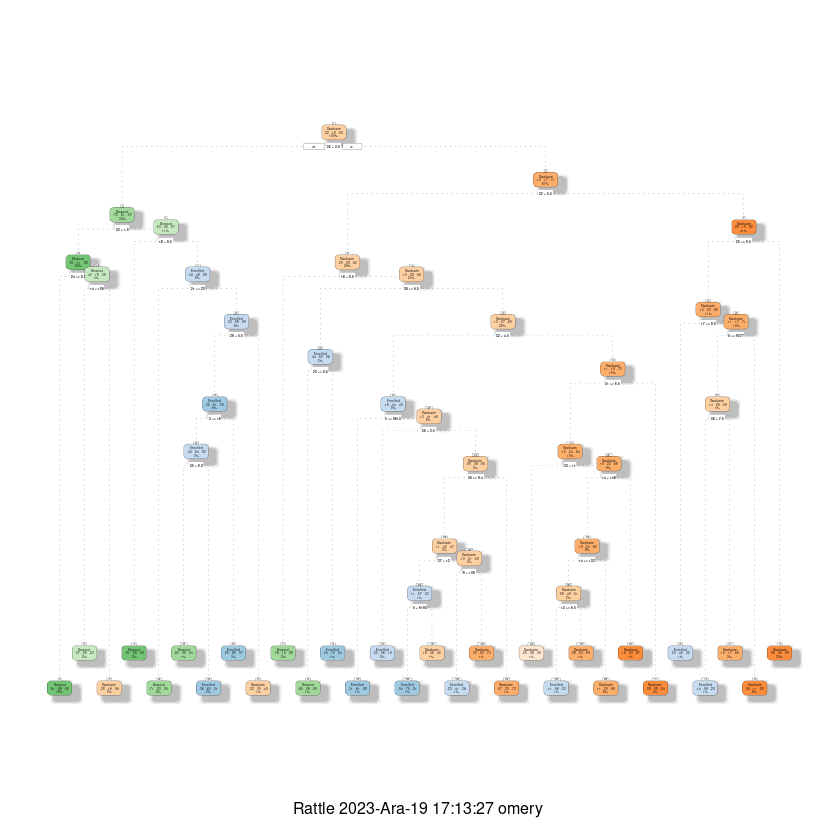

In [ ]:
accuracy_df <- data.frame(matrix(ncol = 2, nrow = 0))
x <- c("accuracy", "bucket_size")
colnames(accuracy_df) <- x
data_test <- as.data.frame(data_academic_test)
data_train <- as.data.frame(data_academic_train)
i <- 0
#dont forget to change target colname
n=nrow(data_test)
head(data_train)
colnames(data_train) <- as.character(c("Target",c(2:37)))
colnames(data_test) <- as.character(c("Target",c(2:37)))


for(i in 1:100){
fit_cl_tree=rpart(Target~.,data_train,method='class', control=rpart.control(minsplit = (2*i), minbucket = i, cp = 0 )) #target name

prediction.model = predict(fit_cl_tree, data_test, type="class")
model.cm = table(prediction.model, data_test$Target) #target name
accuracy=sum(diag(model.cm))/n

accuracy_df[nrow(accuracy_df) + 1,] <- c(accuracy, i)
}
accuracy_df_ordered <- accuracy_df[order(accuracy_df$accuracy,decreasing=TRUE),]

print(paste('Max Accuracy =', accuracy_df_ordered$accuracy[1], " i =", accuracy_df_ordered$bucket_size[1], " Best Tree:")) 
bucket <- accuracy_df_ordered$bucket_size[1]
split <- 2*bucket
fit_cl_tree=rpart(Target~.,data_train,method='class', control=rpart.control(minsplit = split, minbucket = bucket, cp = 0 )) #target name

fancyRpartPlot(fit_cl_tree)

b2. Decision Tree (DT) for Communities and Crime Data Set

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,⋯,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,is_high_crime
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,⋯,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0
2,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,⋯,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,1
3,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,⋯,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,⋯,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0
5,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,⋯,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00,0.00,1
6,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,⋯,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0.00,1


[1] "Max Accuracy = 0.903973509933775  best buckey size = 21  Best Tree:"


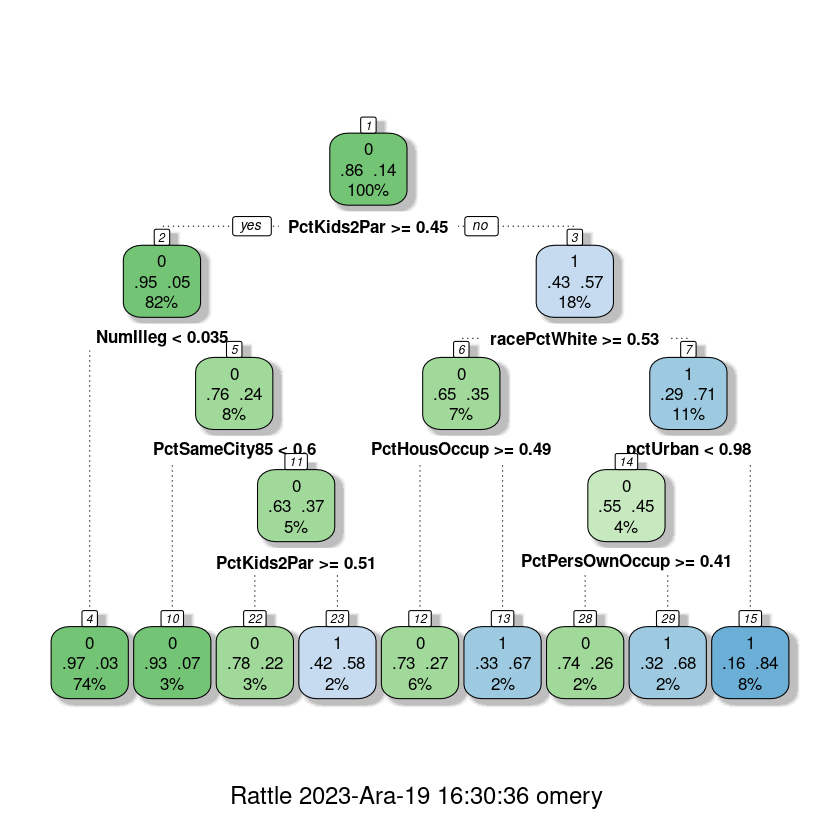

In [ ]:
accuracy_df <- data.frame(matrix(ncol = 2, nrow = 0))
x <- c("accuracy", "bucket_size")
colnames(accuracy_df) <- x
data_test <- as.data.frame(data_communities_test)
data_train <- as.data.frame(data_communities_train)
i <- 0
#dont forget to change target colname
n=nrow(data_test)
head(data_train)



for(i in 1:100){
fit_cl_tree=rpart(is_high_crime~.,data_train,method='class', control=rpart.control(minsplit = (2*i), minbucket = i, cp = 0 )) #target name

prediction.model = predict(fit_cl_tree, data_test, type="class")
model.cm = table(prediction.model, data_test$is_high_crime) #target name
accuracy=sum(diag(model.cm))/n

accuracy_df[nrow(accuracy_df) + 1,] <- c(accuracy, i)
}
accuracy_df_ordered <- accuracy_df[order(accuracy_df$accuracy,decreasing=TRUE),]

print(paste('Max Accuracy =', accuracy_df_ordered$accuracy[1], " best buckey size =", accuracy_df_ordered$bucket_size[1], " Best Tree:")) 
bucket <- accuracy_df_ordered$bucket_size[1]
split <- 2*bucket
fit_cl_tree=rpart(is_high_crime~.,data_train,method='class', control=rpart.control(minsplit = split, minbucket = bucket, cp = 0 )) #target name

fancyRpartPlot(fit_cl_tree)

b3. Decision Tree (DT) for Mushroom Data Set

In [ ]:
accuracy_df <- data.frame(matrix(ncol = 2, nrow = 0))
x <- c("accuracy", "bucket_size")
colnames(accuracy_df) <- x
data_test <- as.data.frame(data_mushroom_test)
data_train <- as.data.frame(data_mushroom_train)
i <- 0
#dont forget to change target colname
n=nrow(data_test)
i=5
head(data_train)



for(i in 1:100){
fit_cl_tree=rpart(p~.,data_train,method='class', control=rpart.control(minsplit = (2*i), minbucket = i, cp = 0 )) #target name

prediction.model = predict(fit_cl_tree, data_test, type="class")
model.cm = table(prediction.model, data_test$p) #target name
accuracy=sum(diag(model.cm))/n

accuracy_df[nrow(accuracy_df) + 1,] <- c(accuracy, i)
}
accuracy_df_ordered <- accuracy_df[order(accuracy_df$accuracy,decreasing=TRUE),]

print(paste('Max Accuracy =', accuracy_df_ordered$accuracy[1], " i =", accuracy_df_ordered$bucket_size[1], " Best Tree:")) 
bucket <- accuracy_df_ordered$bucket_size[1]
split <- 2*bucket
fit_cl_tree=rpart(p~.,data_train,method='class', control=rpart.control(minsplit = split, minbucket = bucket, cp = 0 )) #target name

fancyRpartPlot(fit_cl_tree)

b4. Decision Tree (DT) for Parkinson Data Set

,class,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,⋯,mean_5th_delta_delta,mean_6th_delta_delta,mean_7th_delta_delta,mean_8th_delta_delta,mean_9th_delta_delta,mean_10th_delta_delta,mean_11th_delta_delta,mean_12th_delta_delta,std_Log_energy,std_MFCC_0th_coef
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,0.85247,0.71826,0.57227,240,239,0.008063530,0.000086800,0.00218,⋯,0.00042833,-0.00004410,-0.00033822,0.00043047,0.00003830,-0.00035615,-0.00007620,0.00002660,0.34158,1.02790
2,1,1,0.76686,0.69481,0.53966,234,233,0.008258256,0.000073100,0.00195,⋯,-0.00024127,-0.00061406,-0.00011168,-0.00007230,0.00025242,0.00026005,0.00069057,-0.00010879,0.22994,0.92018
3,1,1,0.85083,0.67604,0.58982,232,231,0.008339590,0.000060400,0.00176,⋯,0.00002520,-0.00056663,-0.00039975,-0.00003720,0.00027211,-0.00003170,-0.00016631,-0.00029845,0.52574,0.92039
4,1,0,0.32790,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,⋯,0.00064602,-0.00039793,0.00025618,0.00057599,-0.00028514,0.00017748,0.00013984,0.00003530,0.17405,0.81706
5,1,1,0.83671,0.62079,0.51179,318,317,0.006073855,0.000135739,0.00282,⋯,-0.00033843,-0.00032082,0.00028387,0.00021403,-0.00042553,0.00027205,-0.00014377,0.00009110,0.17331,0.71091
6,1,1,0.80826,0.61766,0.50447,318,317,0.006057188,0.000069300,0.00161,⋯,-0.00003790,-0.00032464,0.00028771,-0.00046252,0.00022210,-0.00021925,0.00013653,0.00002090,0.14965,0.56705


[1] "Max Accuracy = 0.830357142857143  i = 9  Best Tree:"


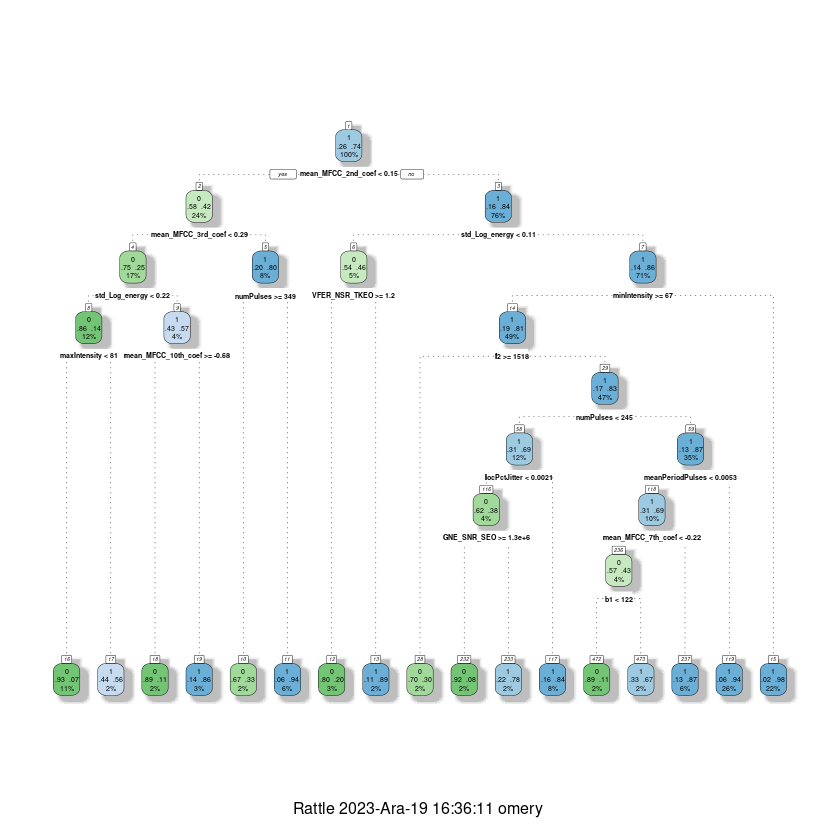

In [ ]:
accuracy_df <- data.frame(matrix(ncol = 2, nrow = 0))
x <- c("accuracy", "bucket_size")
colnames(accuracy_df) <- x
data_test <- as.data.frame(data_pd_test)
data_train <- as.data.frame(data_pd_train)
i <- 0
#dont forget to change target colname
n=nrow(data_test)
i=5
head(data_train)



for(i in 1:100){
fit_cl_tree=rpart(class~.,data_train,method='class', control=rpart.control(minsplit = (2*i), minbucket = i, cp = 0 )) #target name

prediction.model = predict(fit_cl_tree, data_test, type="class")
model.cm = table(prediction.model, data_test$class) #target name
accuracy=sum(diag(model.cm))/n

accuracy_df[nrow(accuracy_df) + 1,] <- c(accuracy, i)
}
accuracy_df_ordered <- accuracy_df[order(accuracy_df$accuracy,decreasing=TRUE),]

print(paste('Max Accuracy =', accuracy_df_ordered$accuracy[1], " i =", accuracy_df_ordered$bucket_size[1], " Best Tree:")) 
bucket <- accuracy_df_ordered$bucket_size[1]
split <- 2*bucket
fit_cl_tree=rpart(class~.,data_train,method='class', control=rpart.control(minsplit = split, minbucket = bucket, cp = 0 )) #target name

fancyRpartPlot(fit_cl_tree)

b5. Decision Tree (DT) for for Digit Recognition

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V56,V57,V58,V59,V60,V61,V62,V63,V64,class
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,0,1,6,15,12,1,0,0,0,7,⋯,0,0,0,6,14,7,1,0,0,0
2,0,0,10,16,6,0,0,0,0,7,⋯,0,0,0,10,16,15,3,0,0,0
3,0,0,8,15,16,13,0,0,0,1,⋯,0,0,0,9,14,0,0,0,0,7
4,0,0,0,3,11,16,0,0,0,0,⋯,0,0,0,0,1,15,2,0,0,4
5,0,0,5,14,4,0,0,0,0,0,⋯,0,0,0,4,12,14,7,0,0,6
6,0,0,11,16,10,1,0,0,0,4,⋯,3,0,0,10,16,16,16,16,6,2


[1] "Max Accuracy = 0.85920979410128  i = 1  Best Tree:"


Warning message:
“labs do not fit even at cex 0.15, there may be some overplotting”


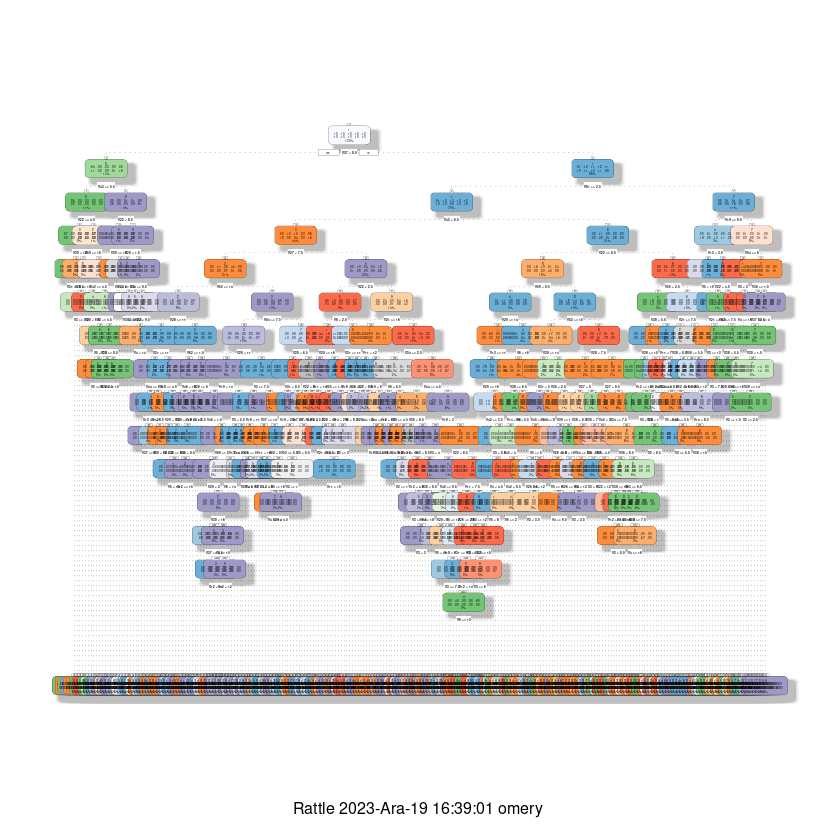

In [ ]:
accuracy_df <- data.frame(matrix(ncol = 2, nrow = 0))
x <- c("accuracy", "bucket_size")
colnames(accuracy_df) <- x
data_test <- as.data.frame(data_digits_test)
data_train <- as.data.frame(data_digits_train)
i <- 0
#dont forget to change target colname
n=nrow(data_test)
i=5
head(data_train)



for(i in 1:100){
fit_cl_tree=rpart(class~.,data_train,method='class', control=rpart.control(minsplit = (2*i), minbucket = i, cp = 0 )) #target name

prediction.model = predict(fit_cl_tree, data_test, type="class")
model.cm = table(prediction.model, data_test$class) #target name
accuracy=sum(diag(model.cm))/n

accuracy_df[nrow(accuracy_df) + 1,] <- c(accuracy, i)
}
accuracy_df_ordered <- accuracy_df[order(accuracy_df$accuracy,decreasing=TRUE),]

print(paste('Max Accuracy =', accuracy_df_ordered$accuracy[1], " i =", accuracy_df_ordered$bucket_size[1], " Best Tree:")) 
bucket <- accuracy_df_ordered$bucket_size[1]
split <- 2*bucket
fit_cl_tree=rpart(class~.,data_train,method='class', control=rpart.control(minsplit = split, minbucket = bucket, cp = 0 )) #target name

fancyRpartPlot(fit_cl_tree)

c1. Random Forrest (RF) for Academic Success Data Set

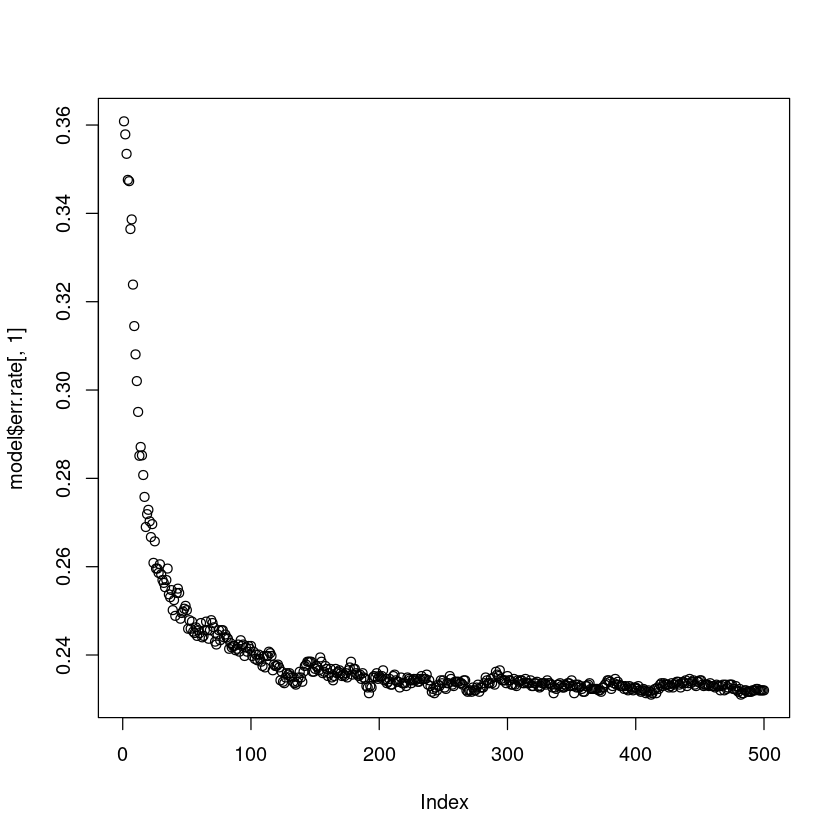

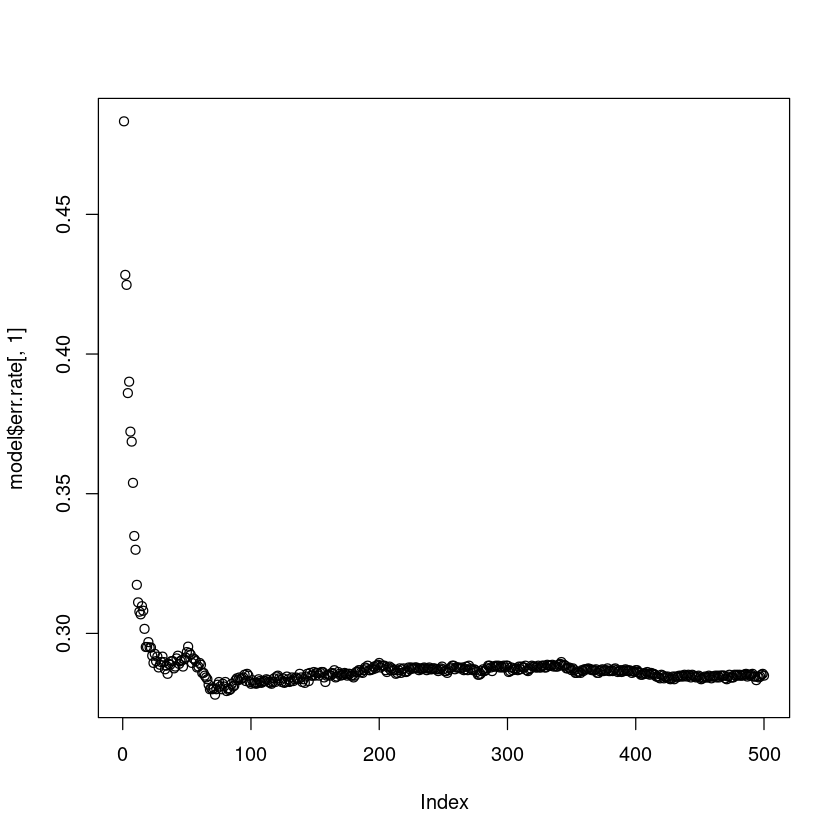

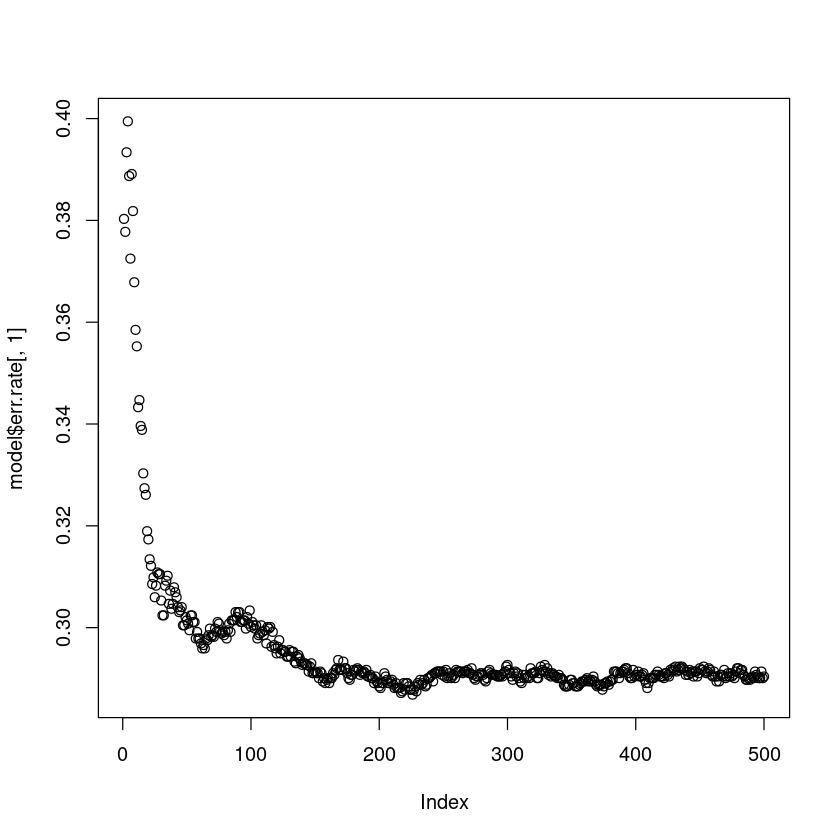

In [44]:
library(randomForest)

set.seed(1)
data_train <- as.data.table(data_academic_train)

data_feat = data.frame(data_train[,-c('Target'),with=F])
y = data_train$Target


#mtry default
model <- randomForest(data_feat, y, mtry=floor(sqrt(ncol(data_train))))
plot(model $err.rate[,1])

#mtry p/3
model <- randomForest(data_feat, y, mtry=max(floor(ncol(x)/3), 1))
plot(model $err.rate[,1])

#mtry p/2
model <- randomForest(data_feat, y, mtry=max(floor(ncol(x)/2), 1))
plot(model $err.rate[,1])



c2. Random Forrest (RF) for communities and Crime Data Set

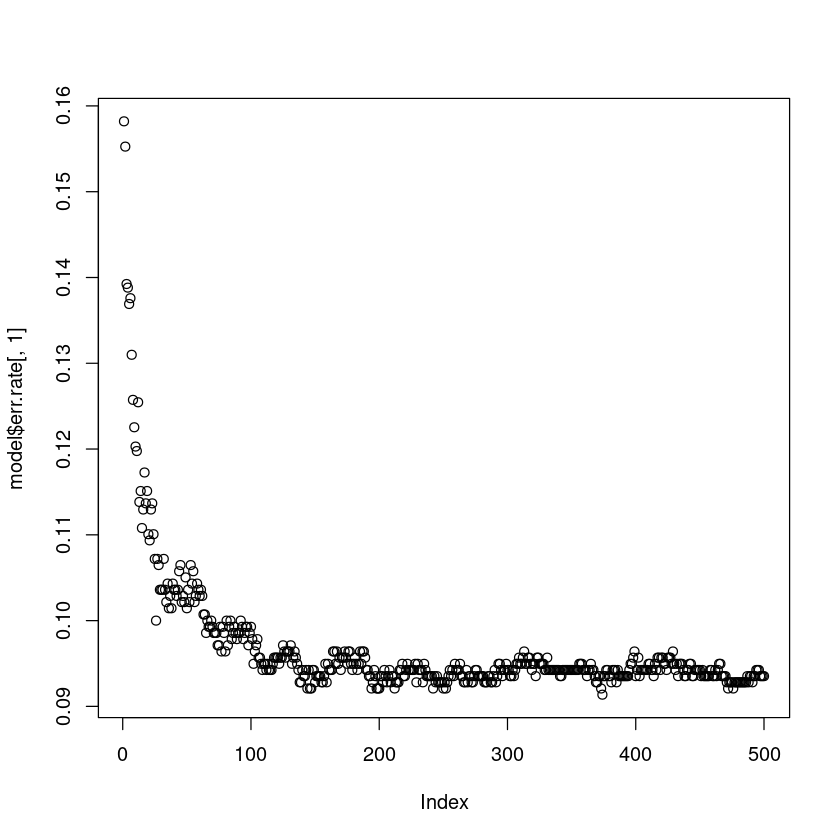

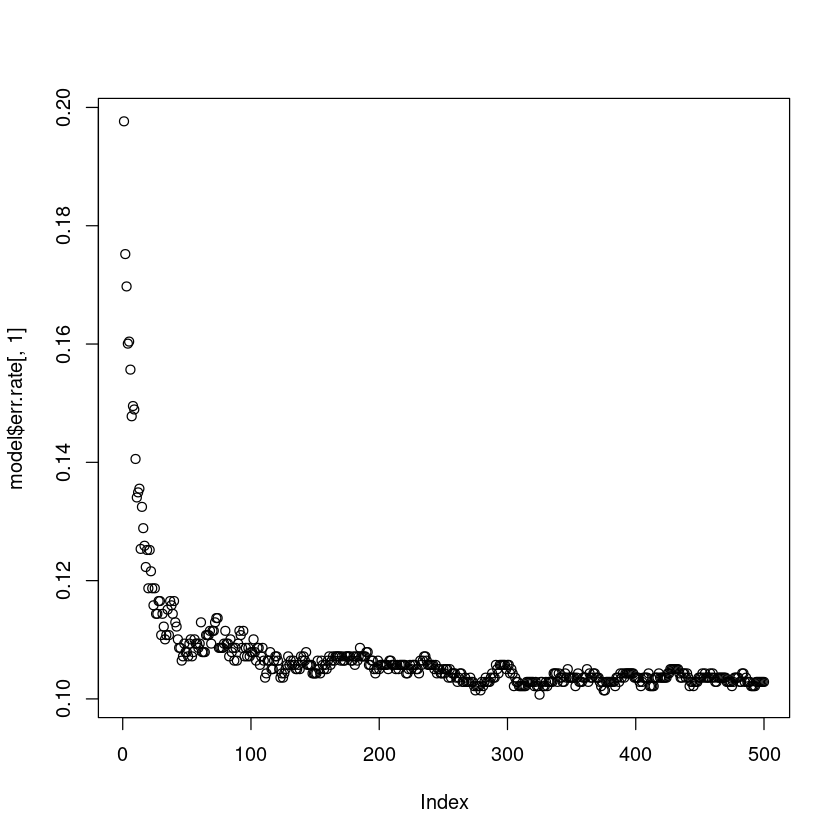

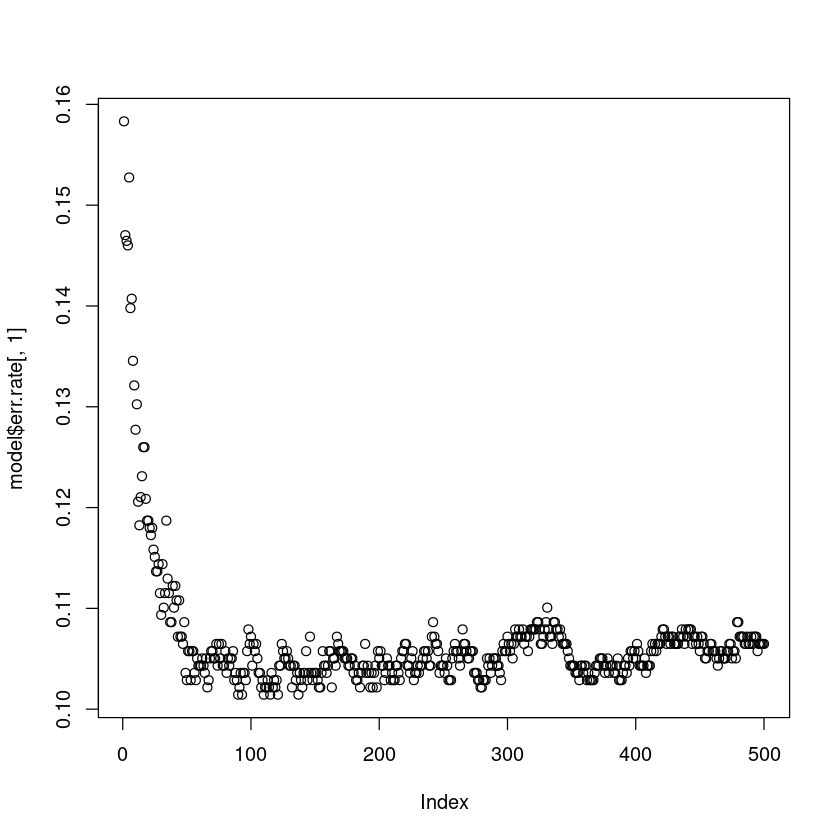

In [46]:

set.seed(1)
data_train <- as.data.table(data_communities_train)

data_feat = data.frame(data_train[,-c('is_high_crime'),with=F])
y = data_train$is_high_crime


#mtry default
model <- randomForest(data_feat, y, mtry=floor(sqrt(ncol(data_train))))
plot(model $err.rate[,1])

#mtry p/3
model <- randomForest(data_feat, y, mtry=max(floor(ncol(x)/3), 1))
plot(model $err.rate[,1])

#mtry p/2
model <- randomForest(data_feat, y, mtry=max(floor(ncol(x)/2), 1))
plot(model $err.rate[,1])


c3. Random Forrest (RF) for mushroom Data Set

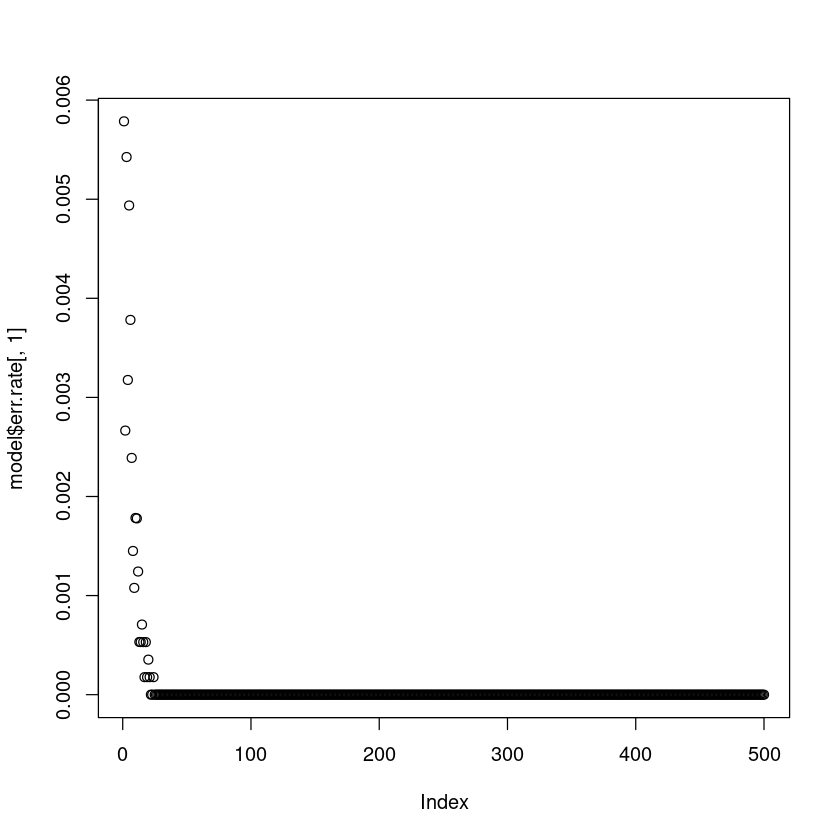

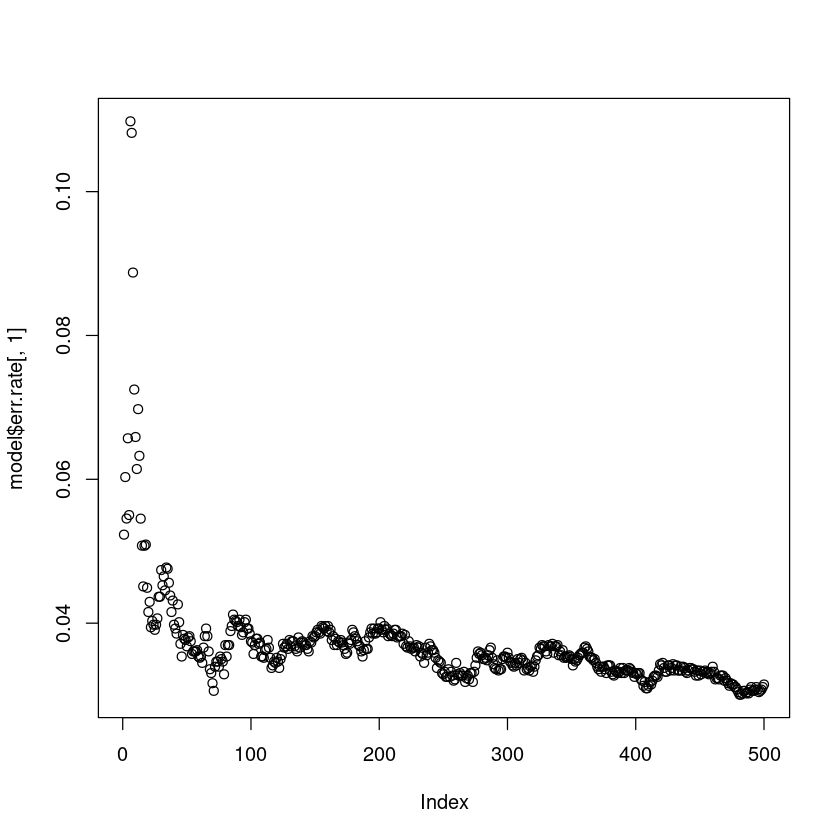

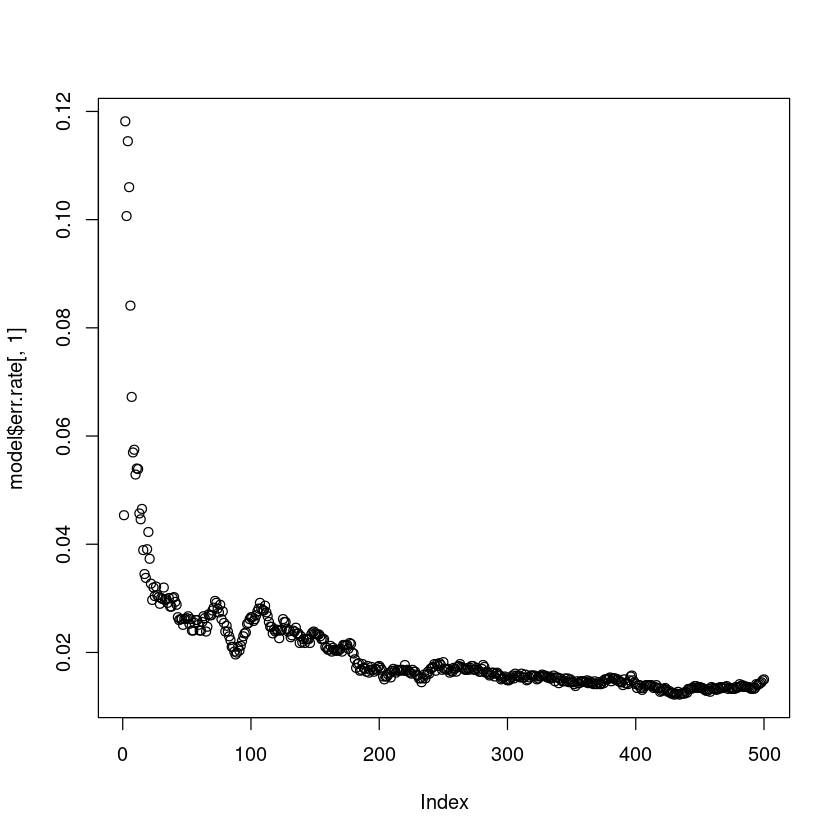

In [49]:
set.seed(1)
data_train <- as.data.table(data_mushroom_train)

data_feat = data.frame(data_train[,-c('p','p.1','e.1'),with=F])
y = data_train$p


#mtry default
model <- randomForest(data_feat, y, mtry=floor(sqrt(ncol(data_train))))
plot(model $err.rate[,1])

#mtry p/3
model <- randomForest(data_feat, y, mtry=max(floor(ncol(x)/3), 1))
plot(model $err.rate[,1])

#mtry p/2
model <- randomForest(data_feat, y, mtry=max(floor(ncol(x)/2), 1))
plot(model $err.rate[,1])


c4. Random Forrest (RF) for Parkinson Data Set

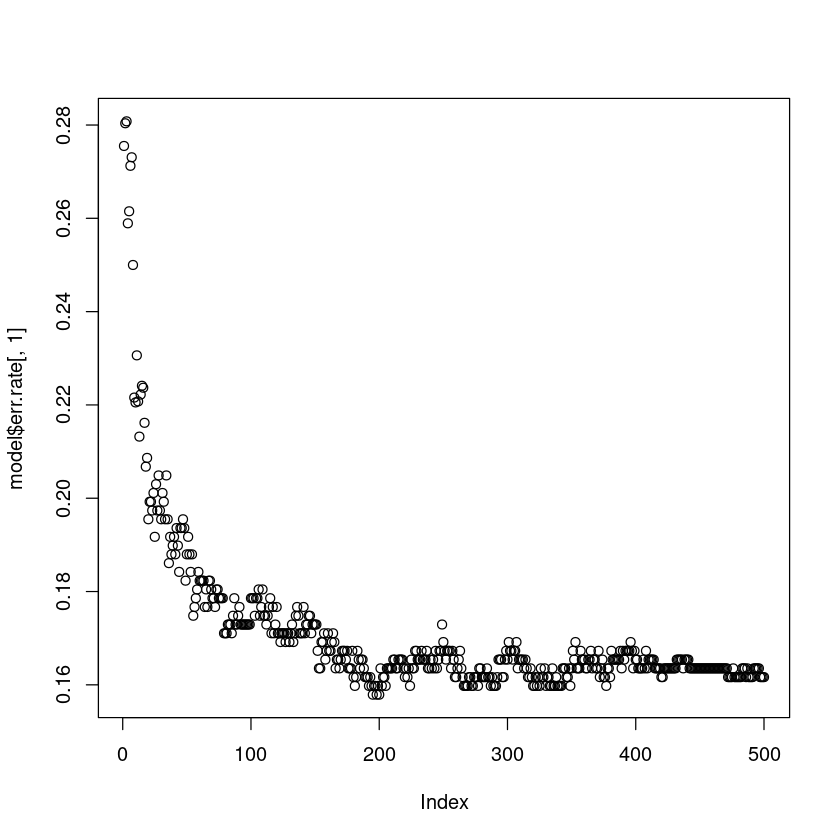

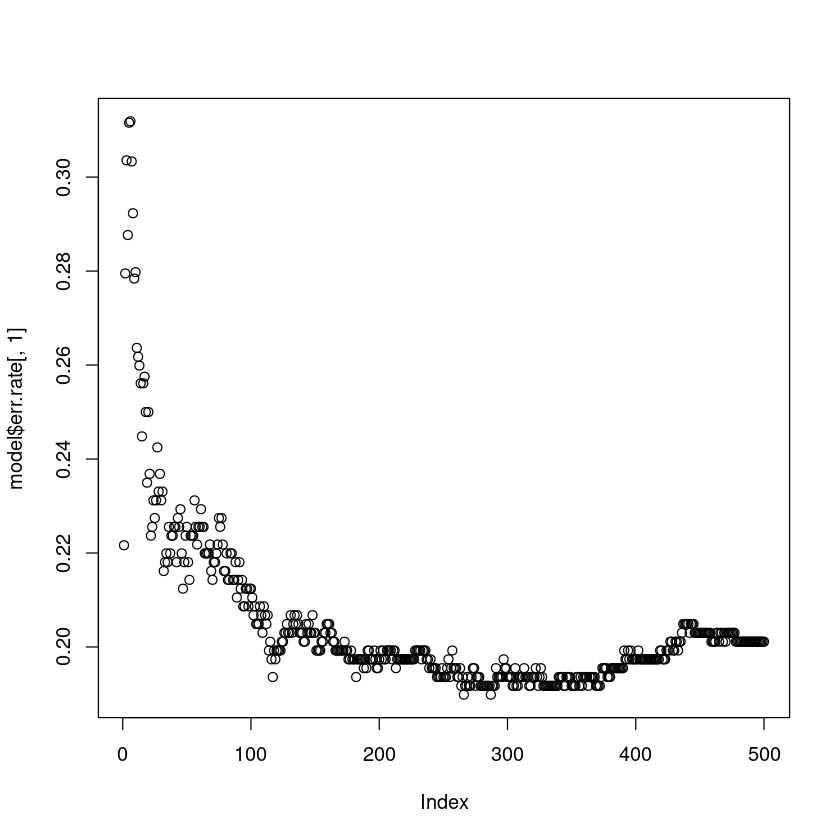

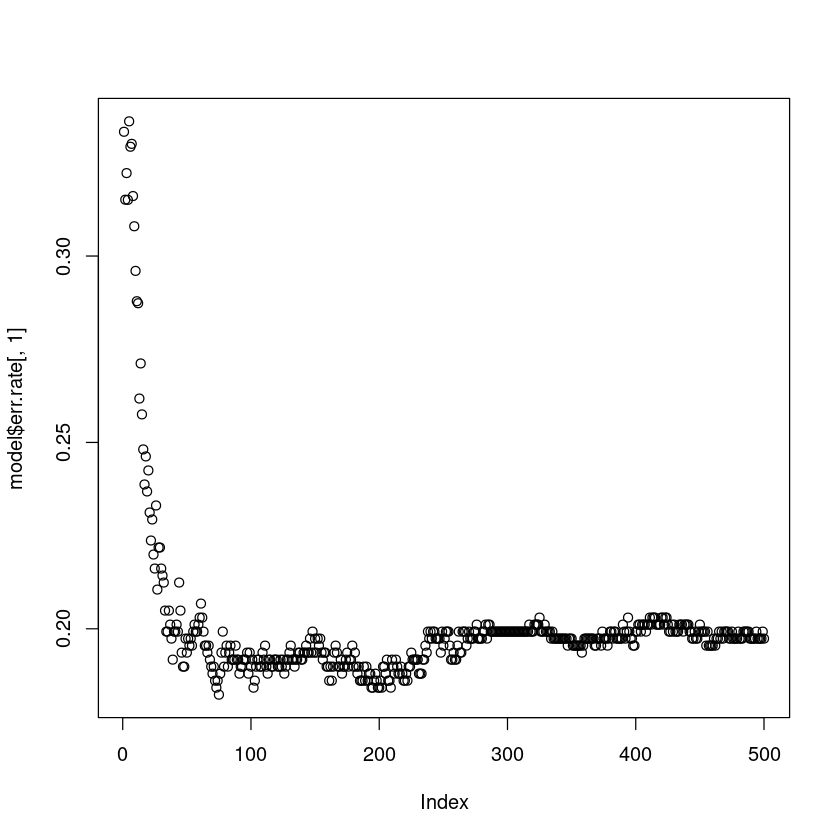

In [53]:
set.seed(1)
data_train <- as.data.table(data_pd_train)

data_train <- data_train %>%
  select(class, everything())

data_train <- data_train[,1:100] 

data_feat = data.frame(data_train[,-c('class'),with=F])
y = data_train$class


#mtry default
model <- randomForest(data_feat, y, mtry=floor(sqrt(ncol(data_train))))
plot(model $err.rate[,1])

#mtry p/3
model <- randomForest(data_feat, y, mtry=max(floor(ncol(x)/3), 1))
plot(model $err.rate[,1])

#mtry p/2
model <- randomForest(data_feat, y, mtry=max(floor(ncol(x)/2), 1))
plot(model $err.rate[,1])

c5. Random Forrest (RF) for Digits Data Set

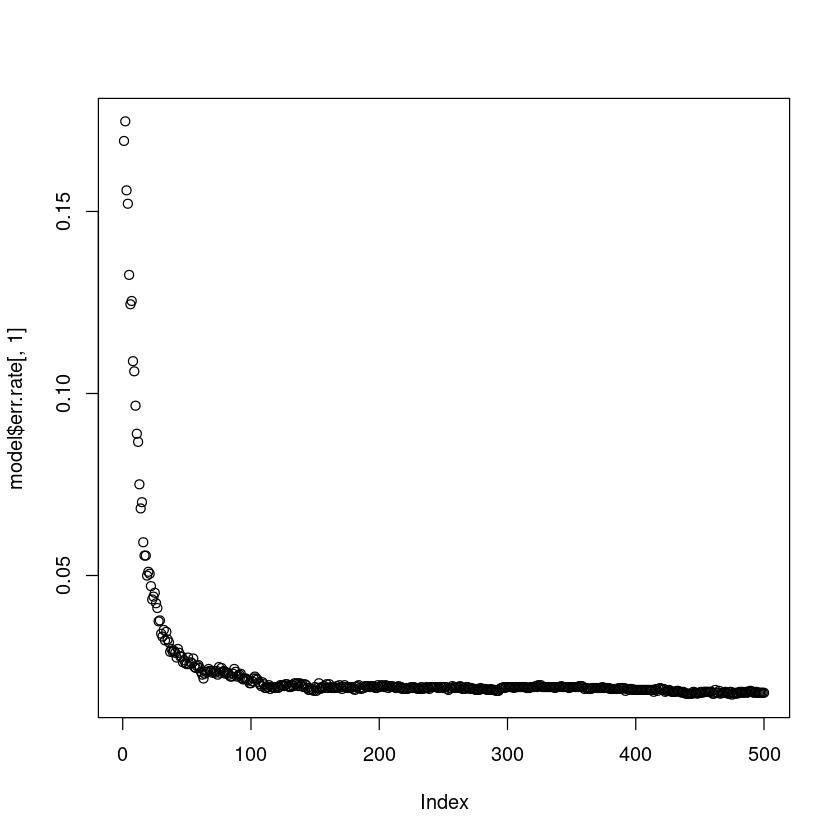

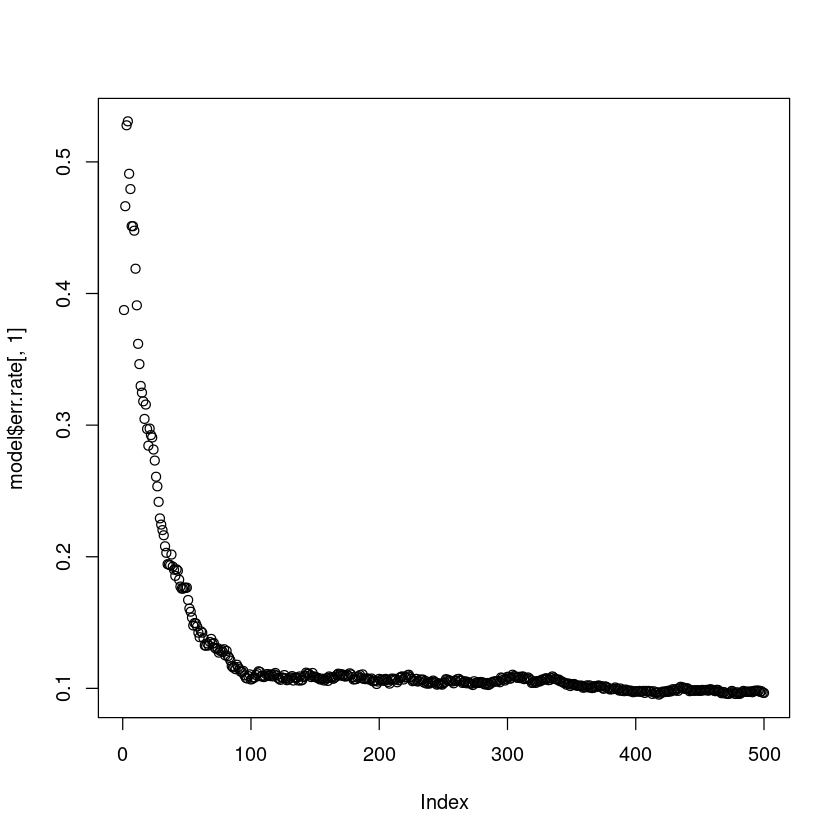

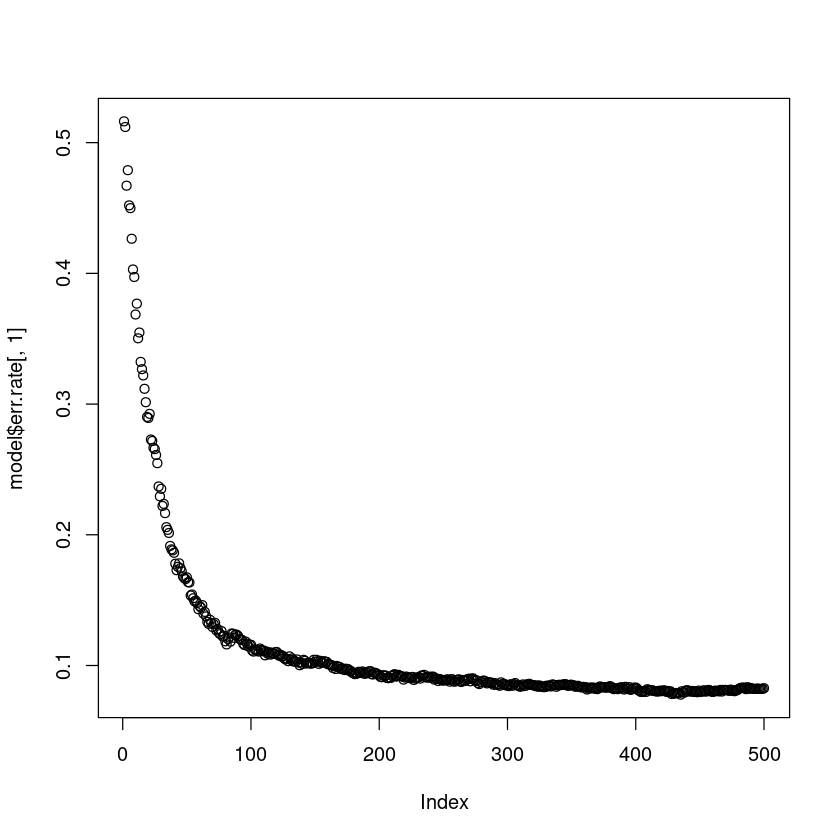

In [54]:
set.seed(1)
data_train <- as.data.table(data_digits_train)

data_feat = data.frame(data_train[,-c('class'),with=F])
y = data_train$class


#mtry default
model <- randomForest(data_feat, y, mtry=floor(sqrt(ncol(data_train))))
plot(model $err.rate[,1])

#mtry p/3
model <- randomForest(data_feat, y, mtry=max(floor(ncol(x)/3), 1))
plot(model $err.rate[,1])

#mtry p/2
model <- randomForest(data_feat, y, mtry=max(floor(ncol(x)/2), 1))
plot(model $err.rate[,1])

d1. Gradient Boosted Tree (GBT) for Academics Data Set

In [57]:

install.packages("gbm")

Installing package into ‘/home/omery/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



[1] 10
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 10 
Equivalent Number of Parameters: 3.84 
Residual Standard Error: 0.005045 


OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



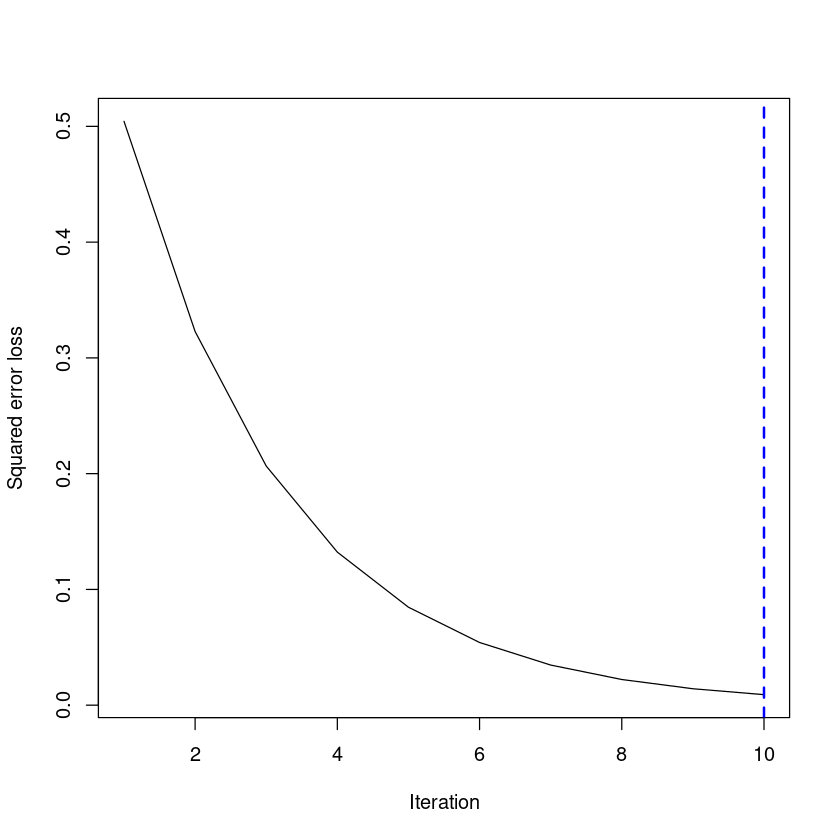

[1] 13
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 50 
Equivalent Number of Parameters: 4.48 
Residual Standard Error: 0.02202 


OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



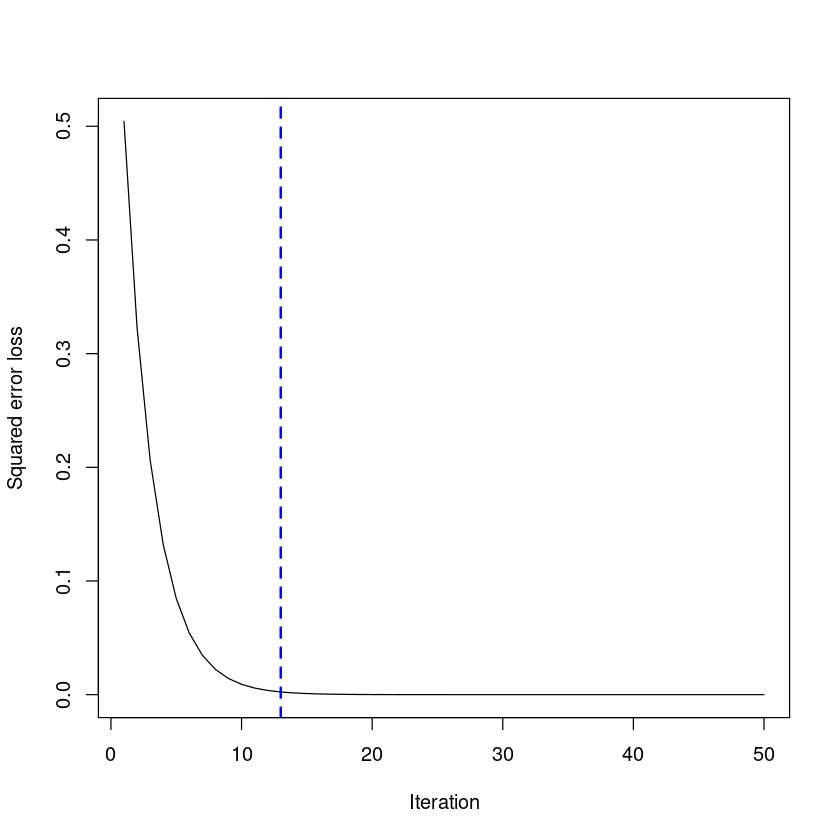

[1] 12
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.01602 


OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



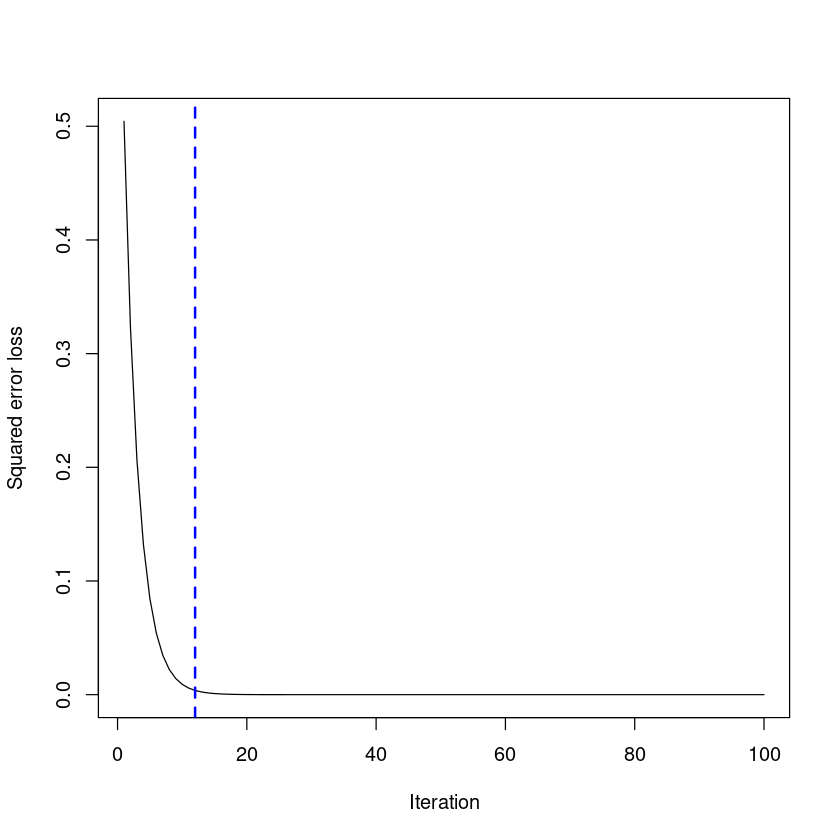

[1] 11
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.04655 


OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



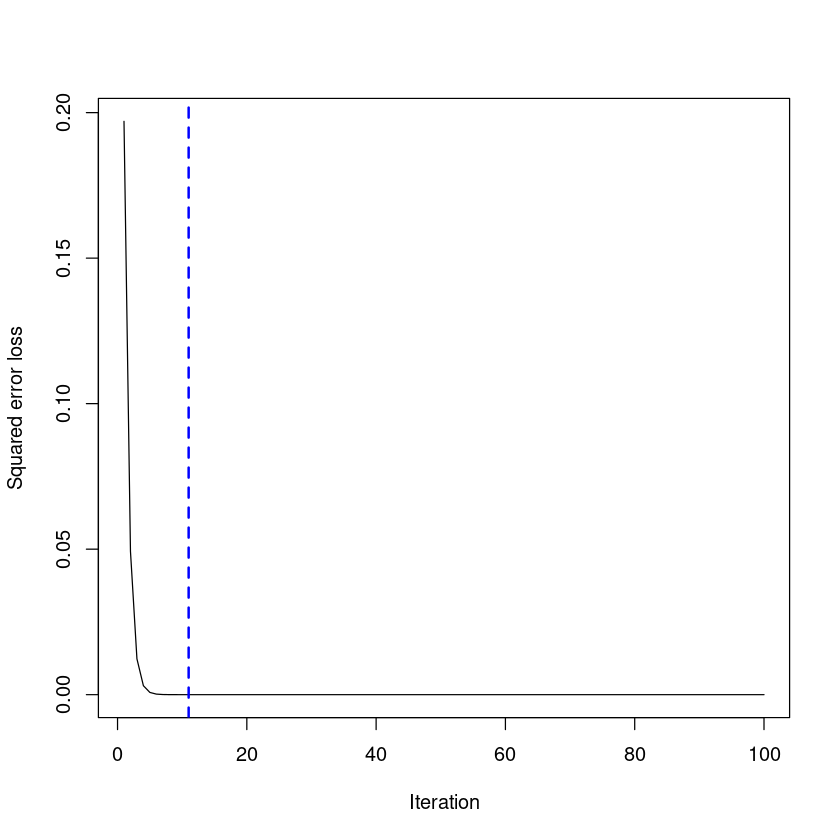

[1] 13
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.01561 


OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



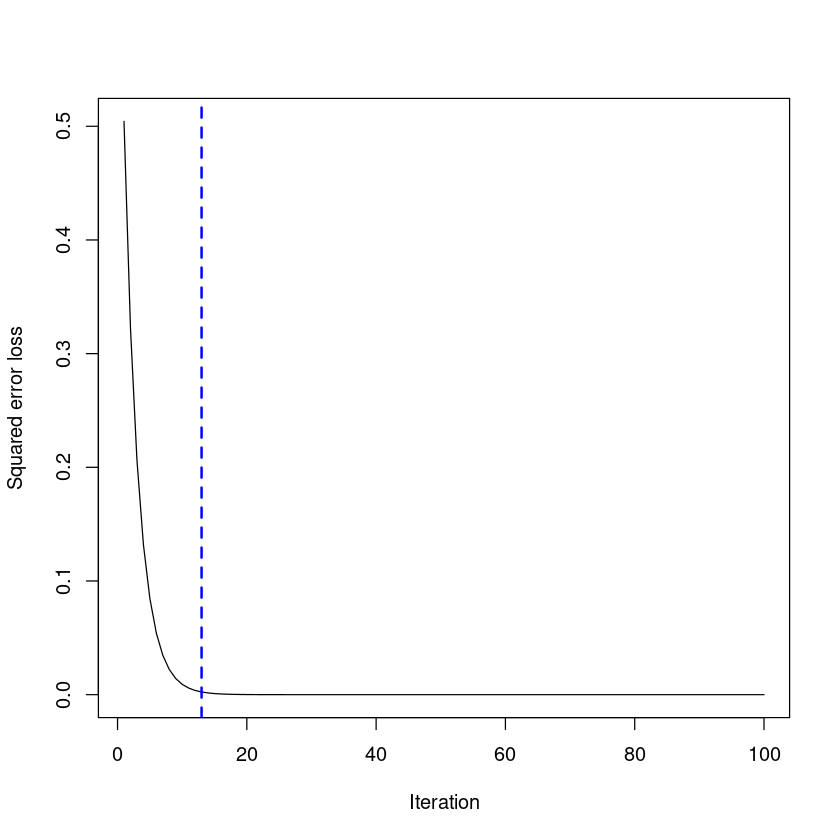

[1] 12
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.01587 


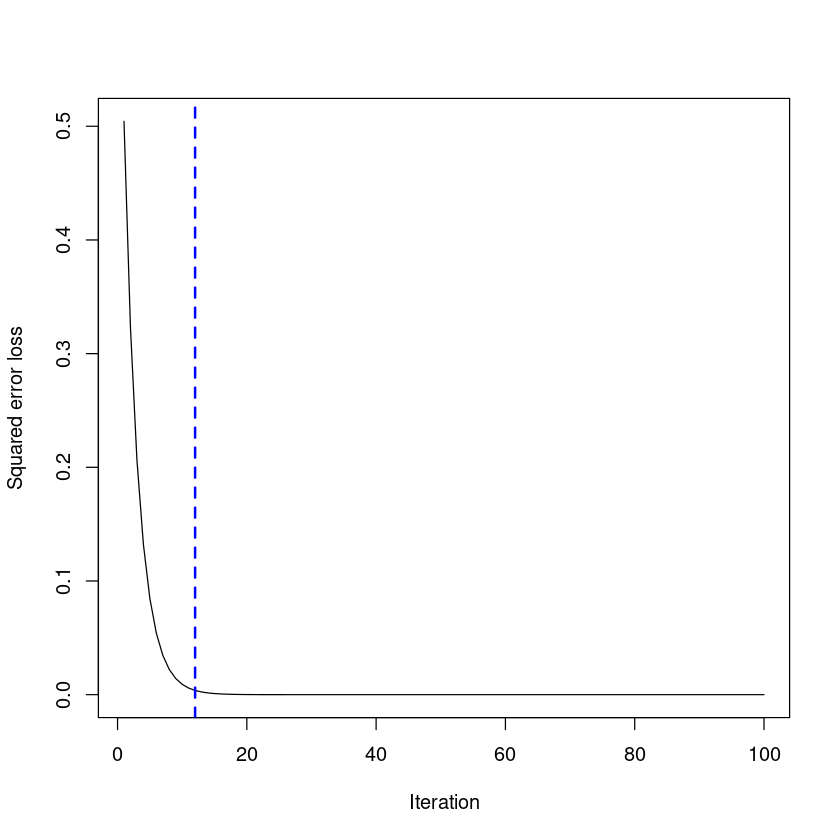

In [80]:
require(gbm)


data_train <- as.data.frame(data_academic_train)
y=data_train$Target


noftrees=10
depth=5
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=50
depth=5
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=100
depth=5
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=100
depth=5
learning_rate=0.5
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=100
depth=5
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=100
depth=10
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

d2. Gradient Boosted Tree (GBT) for communities Data Set

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



[1] 10
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 10 
Equivalent Number of Parameters: 3.84 
Residual Standard Error: 0.001825 


OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



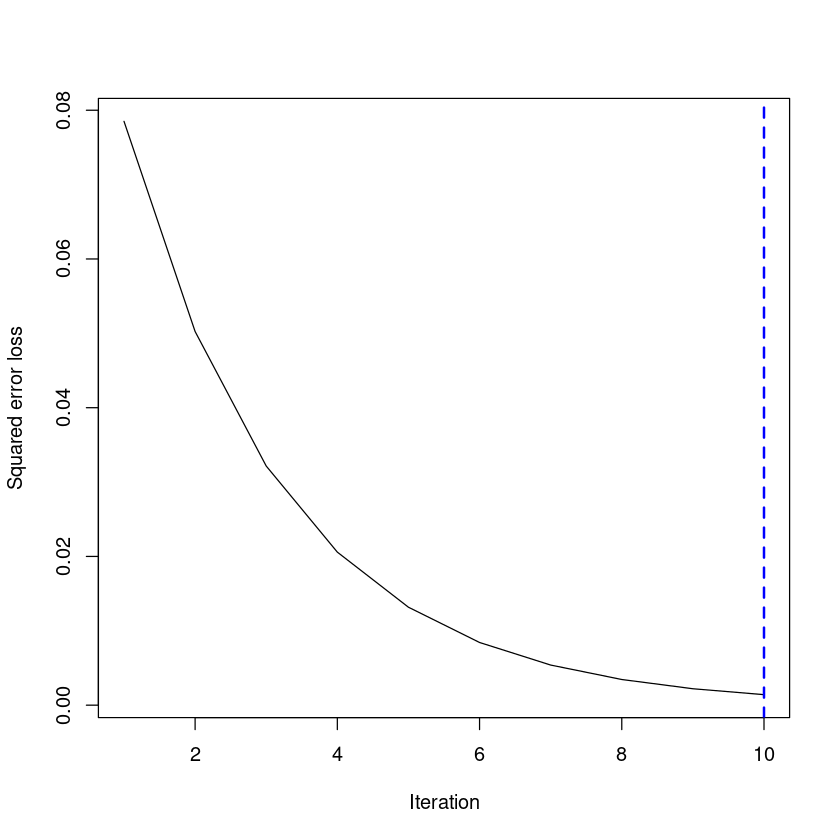

[1] 13
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 20 
Equivalent Number of Parameters: 3.73 
Residual Standard Error: 0.002173 


OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



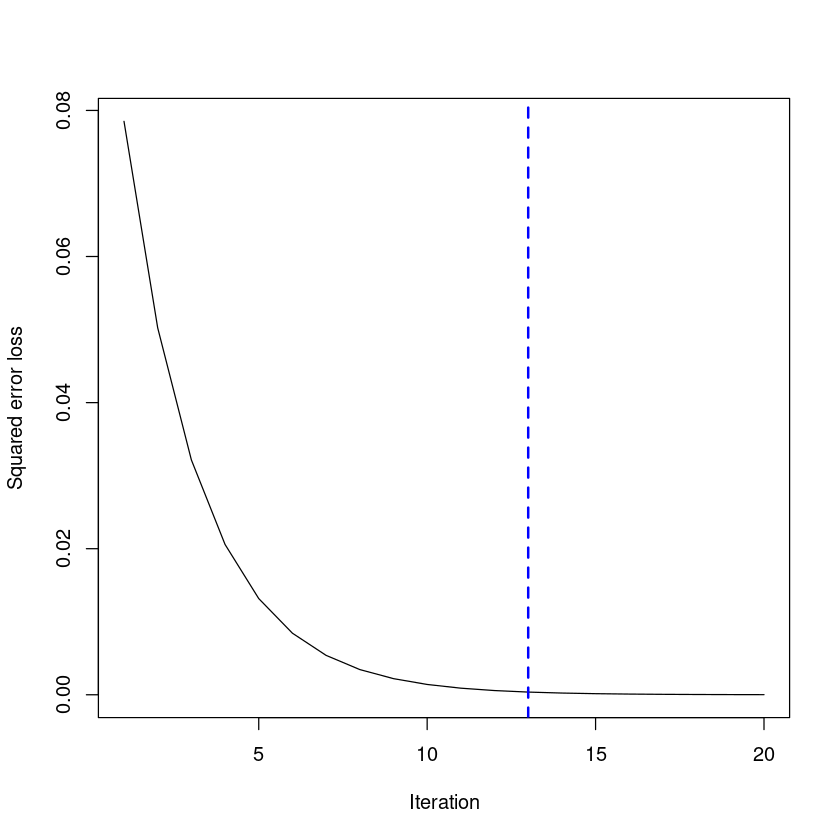

[1] 13
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.002046 


OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



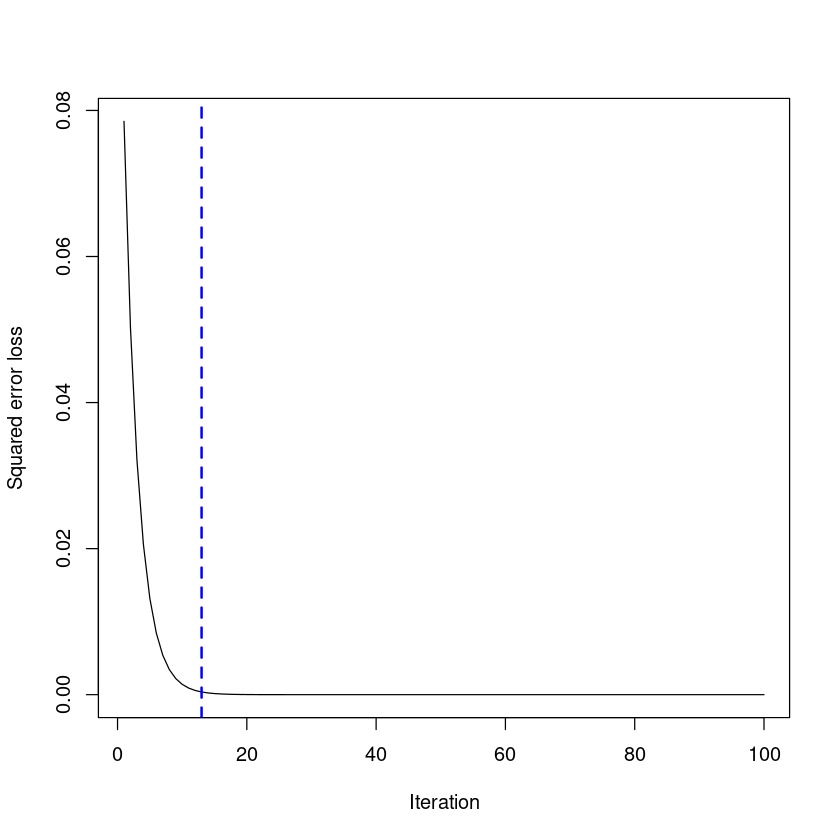

[1] 11
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.006492 


OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



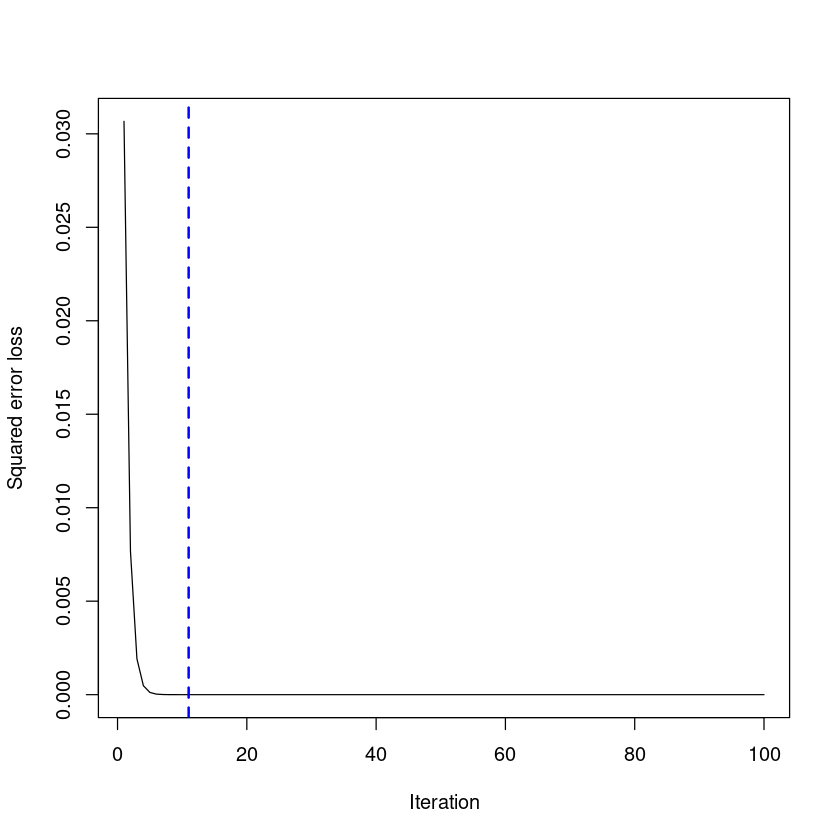

[1] 13
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.002394 


OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



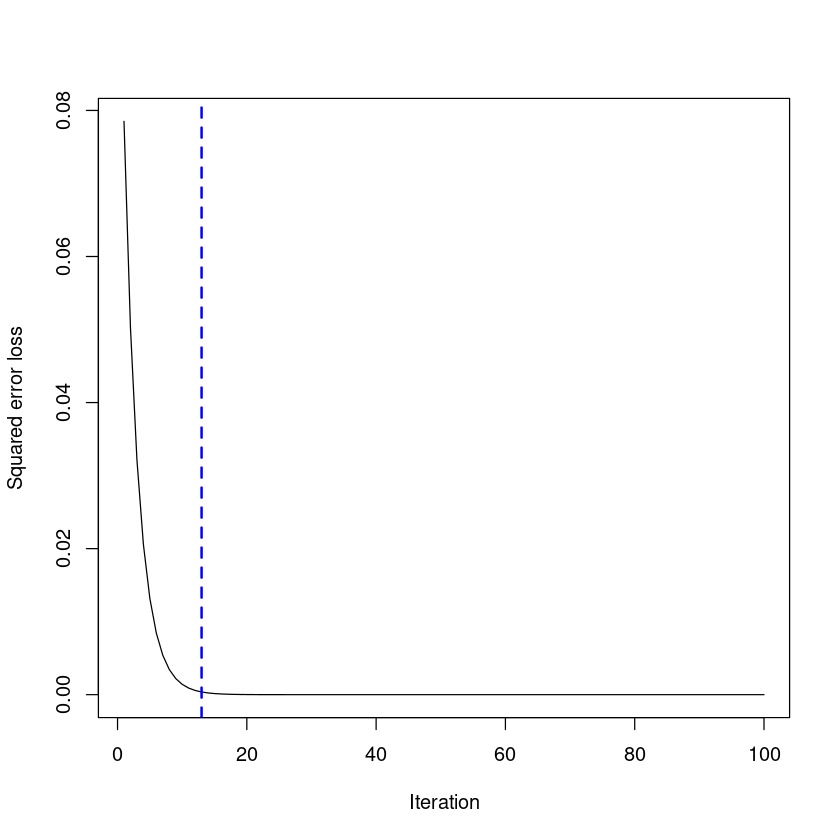

[1] 12
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.002557 


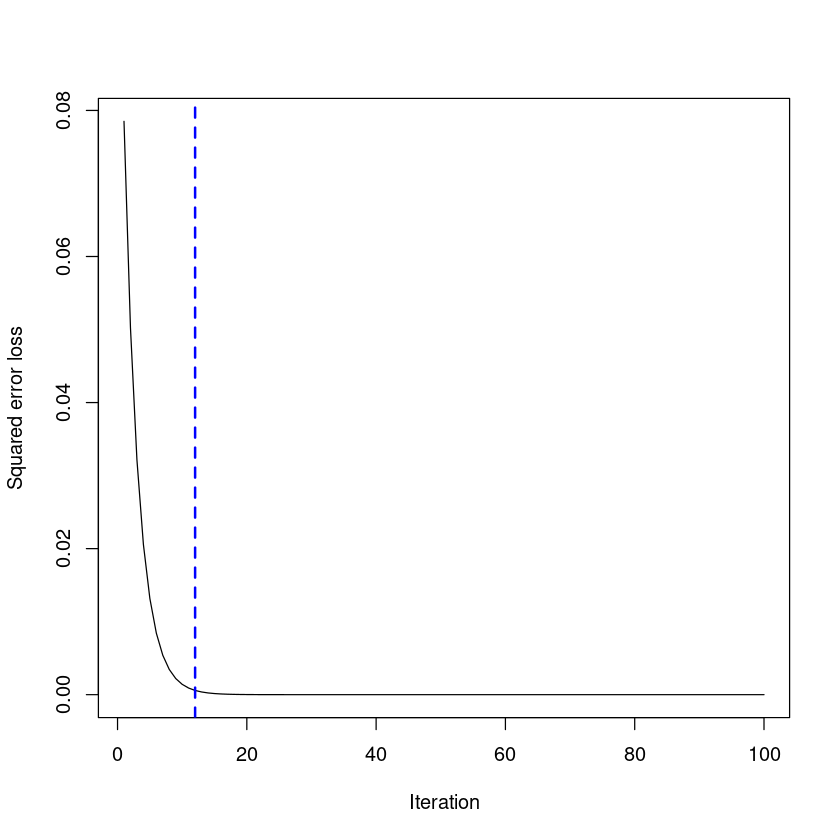

In [81]:
data_train <- as.data.frame(data_communities_train)
y=data_train$is_high_crime


noftrees=10
depth=5
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=20
depth=5
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=100
depth=5
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=100
depth=5
learning_rate=0.5
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=100
depth=5
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=100
depth=10
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

d3. Gradient Boosted Tree (GBT) for mushroom Data Set

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



[1] 10
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 10 
Equivalent Number of Parameters: 3.84 
Residual Standard Error: 0.001906 


OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



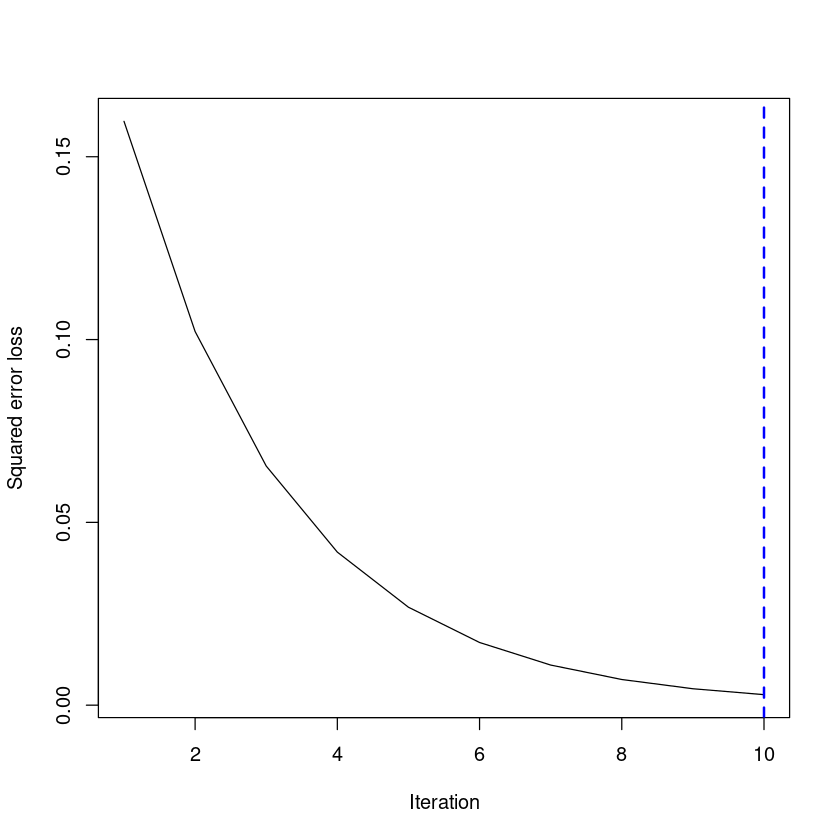

[1] 13
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 20 
Equivalent Number of Parameters: 3.73 
Residual Standard Error: 0.004872 


OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



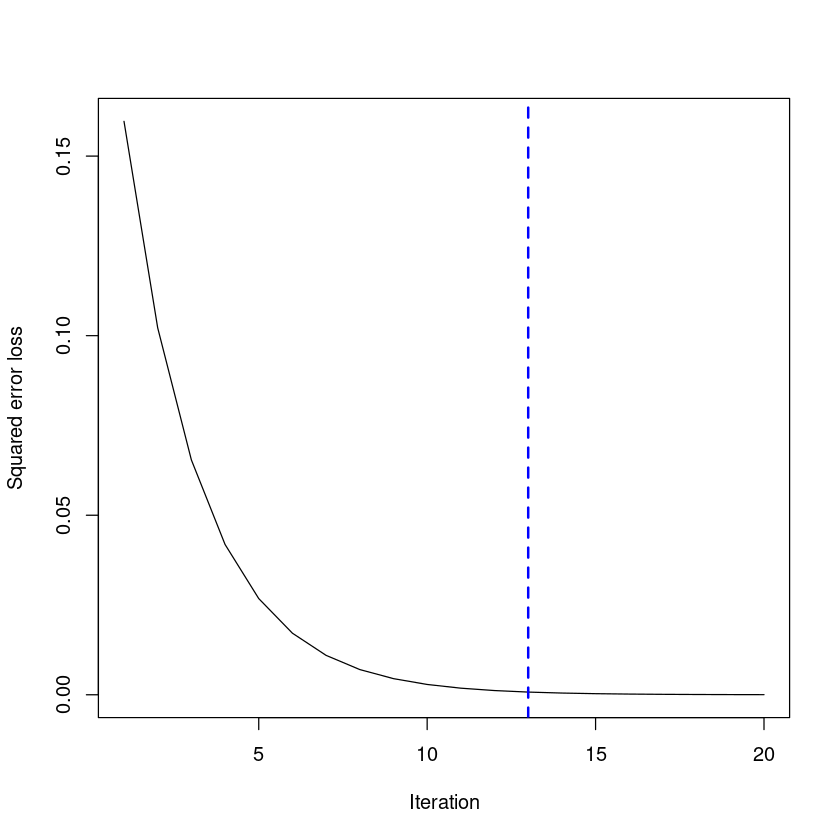

[1] 13
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.004946 


OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



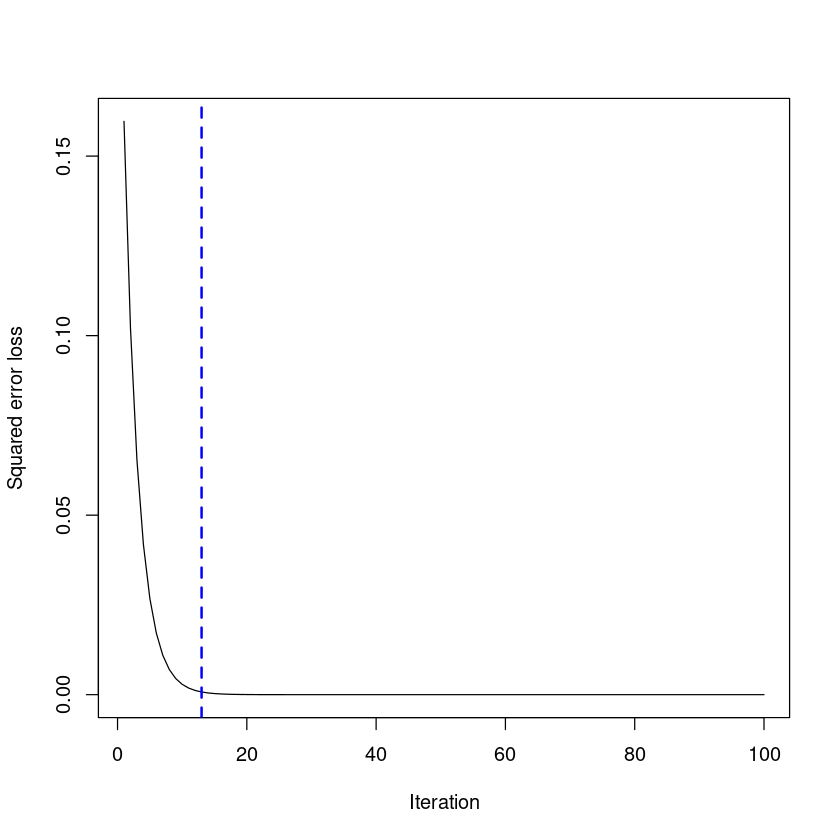

[1] 11
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.01469 


OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



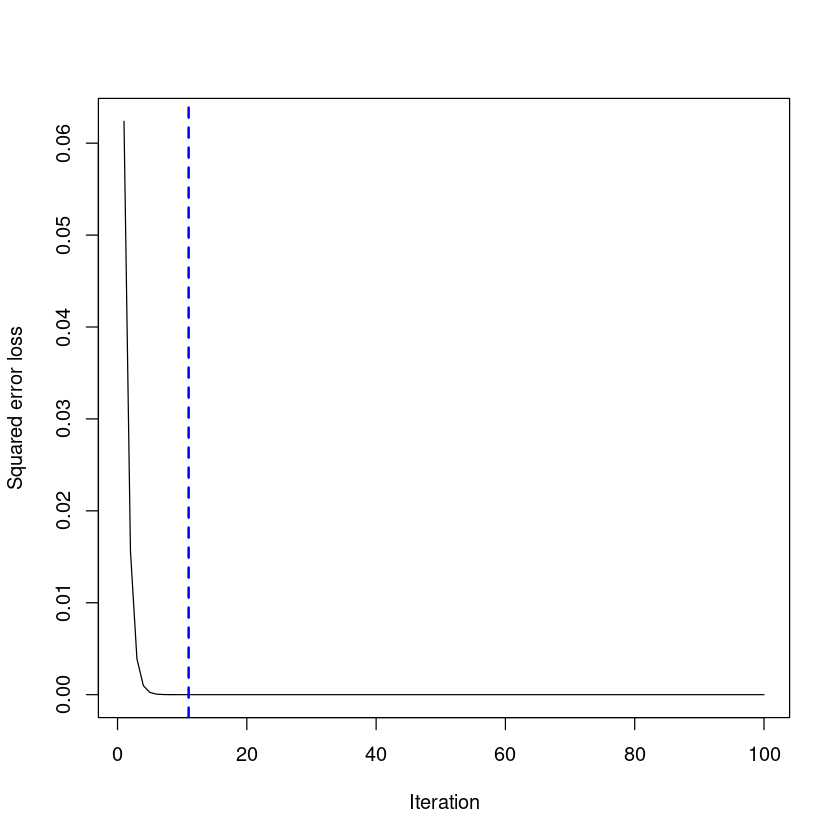

[1] 13
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.004945 


OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



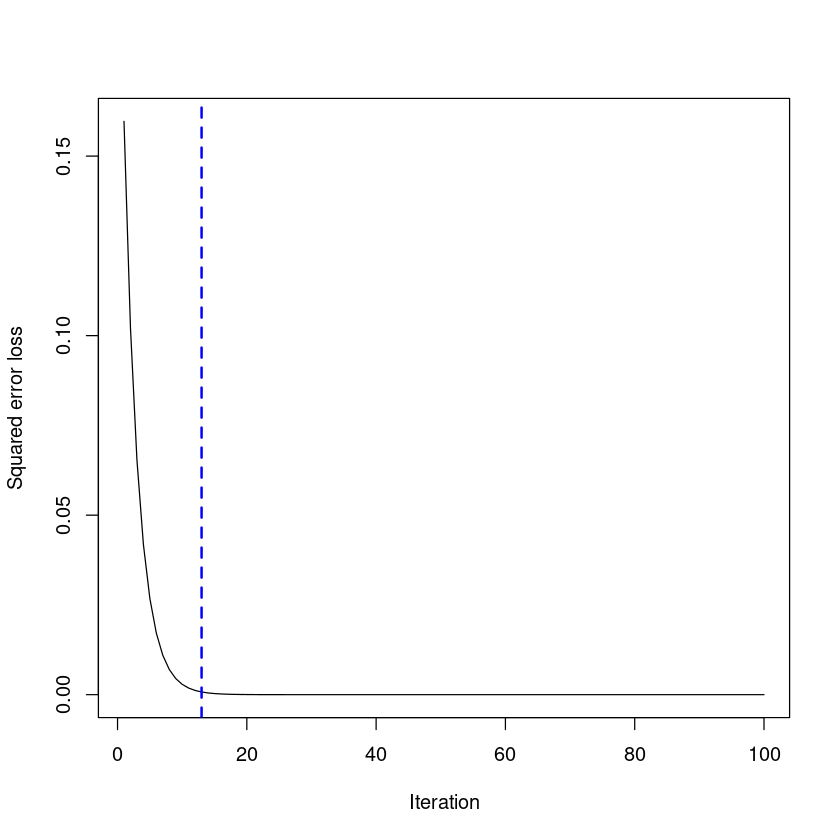

[1] 13
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.004954 


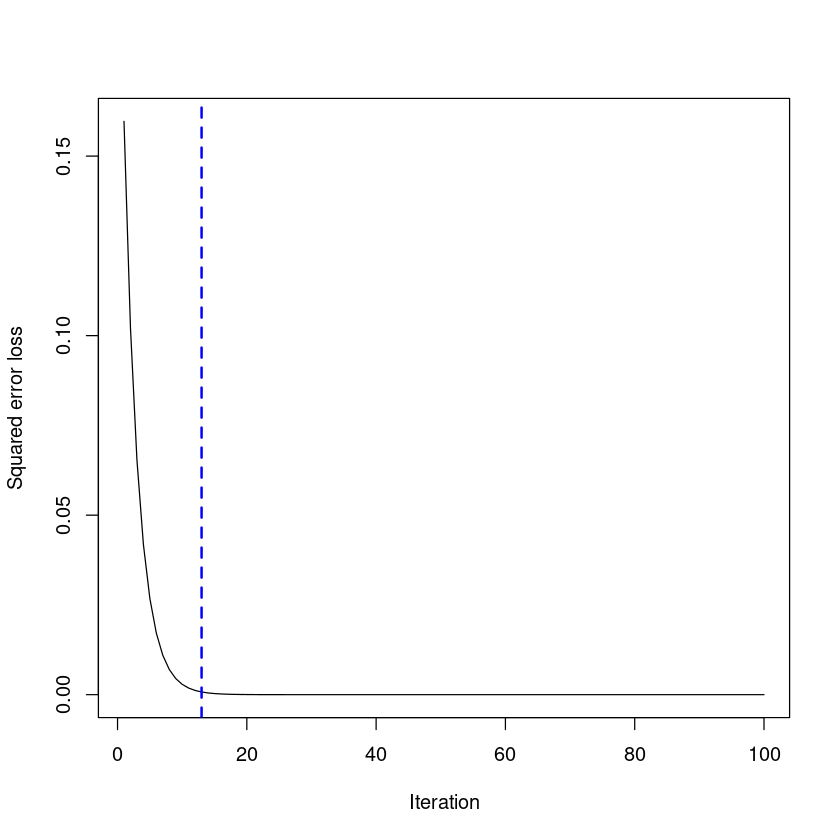

In [82]:
data_train <- as.data.frame(data_mushroom_train)
y=data_train$p


noftrees=10
depth=5
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=20
depth=5
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=100
depth=5
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=100
depth=5
learning_rate=0.5
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=100
depth=5
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=100
depth=10
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

d4. Gradient Boosted Tree (GBT) for parkinson Data Set

OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



[1] 10
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 10 
Equivalent Number of Parameters: 3.84 
Residual Standard Error: 0.001018 


OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



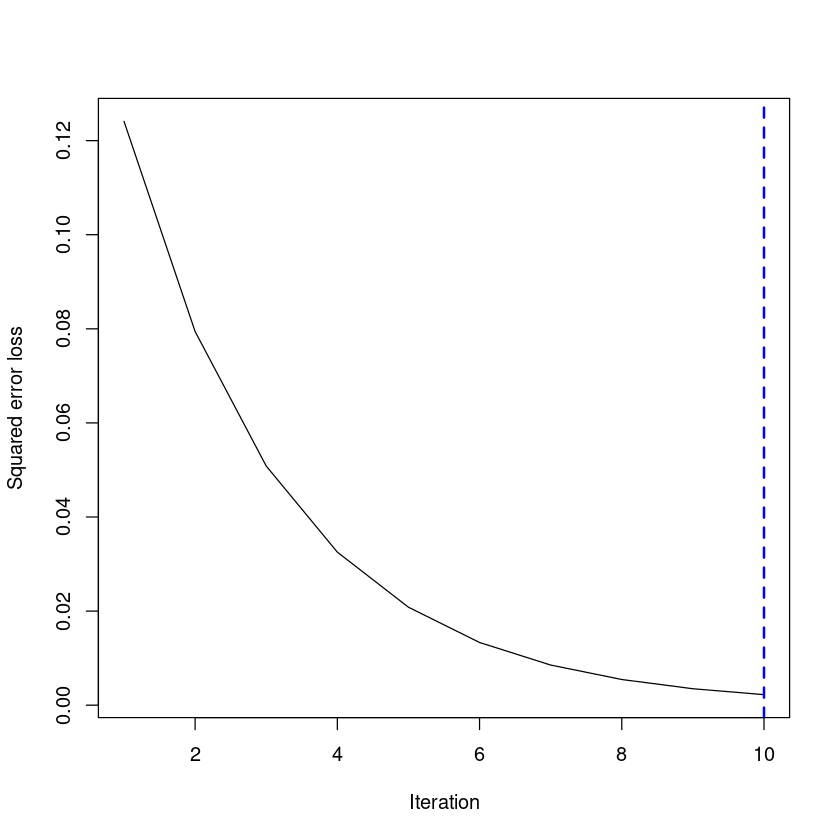

[1] 13
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 20 
Equivalent Number of Parameters: 3.73 
Residual Standard Error: 0.003819 


OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



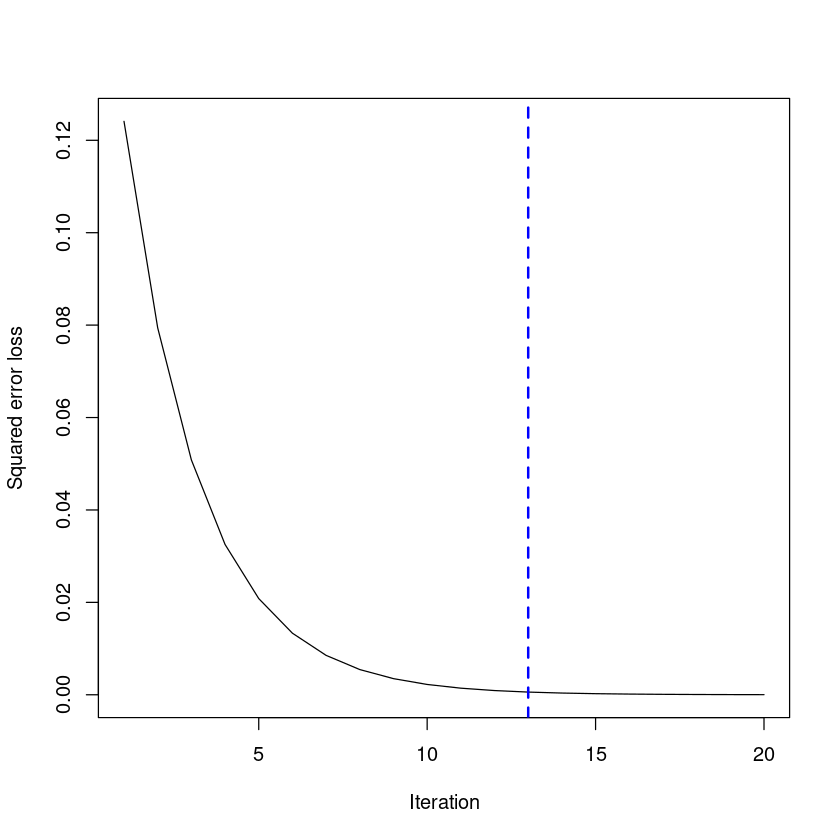

[1] 13
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.003614 


OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



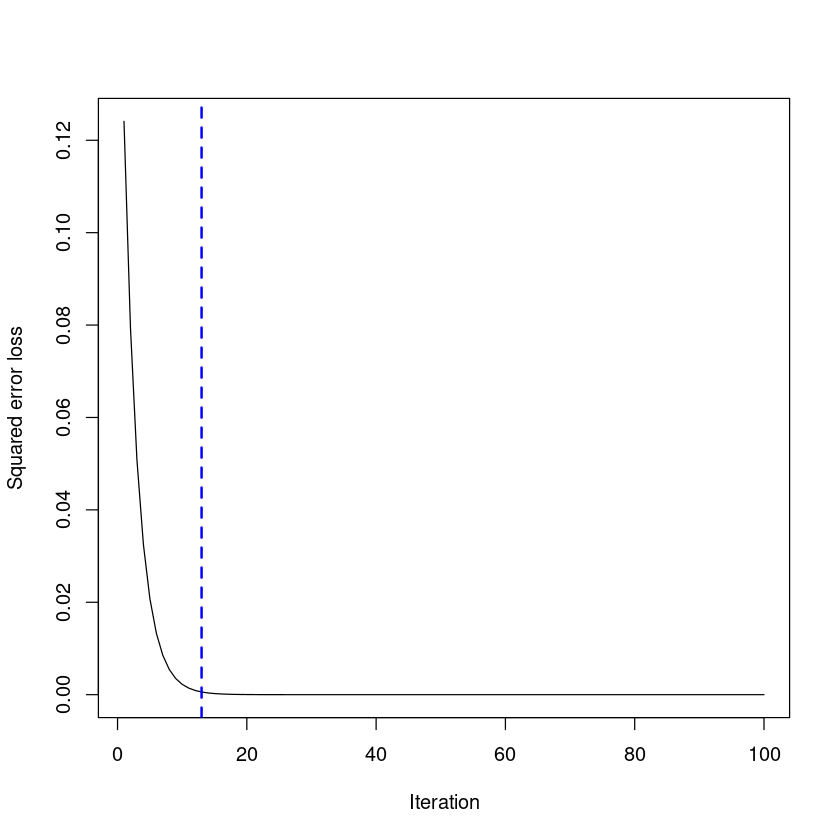

[1] 11
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.01051 


OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



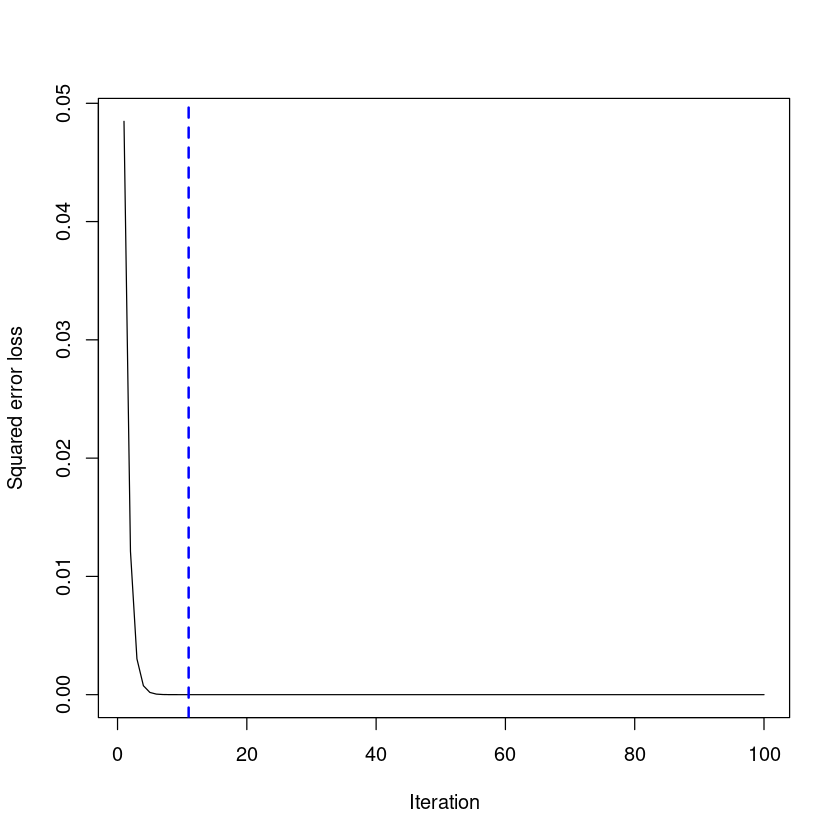

[1] 13
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.003692 


OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



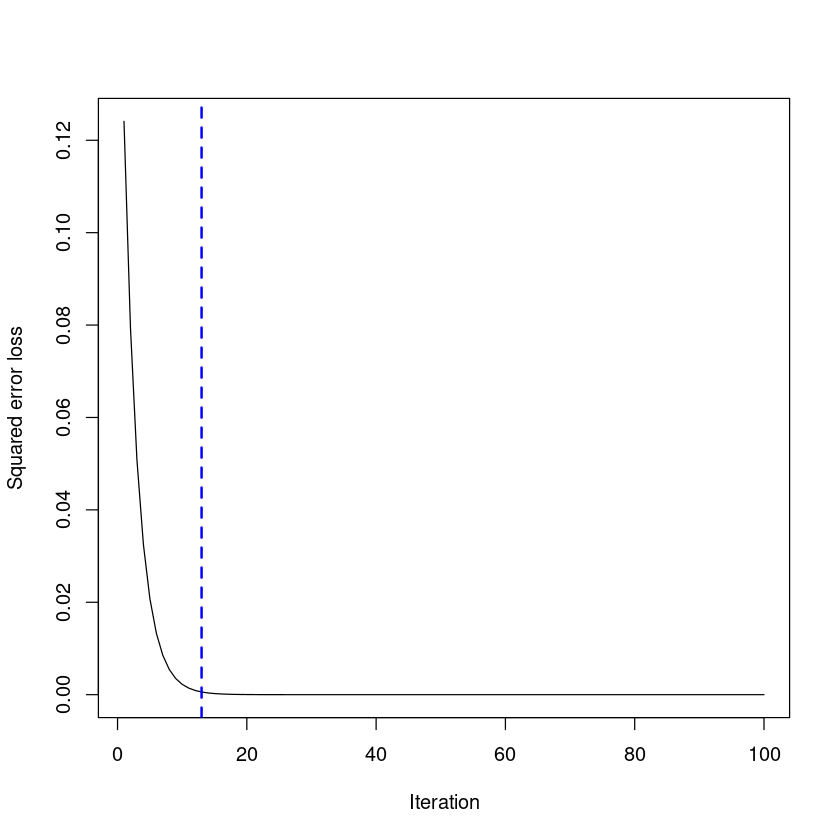

[1] 13
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.003933 


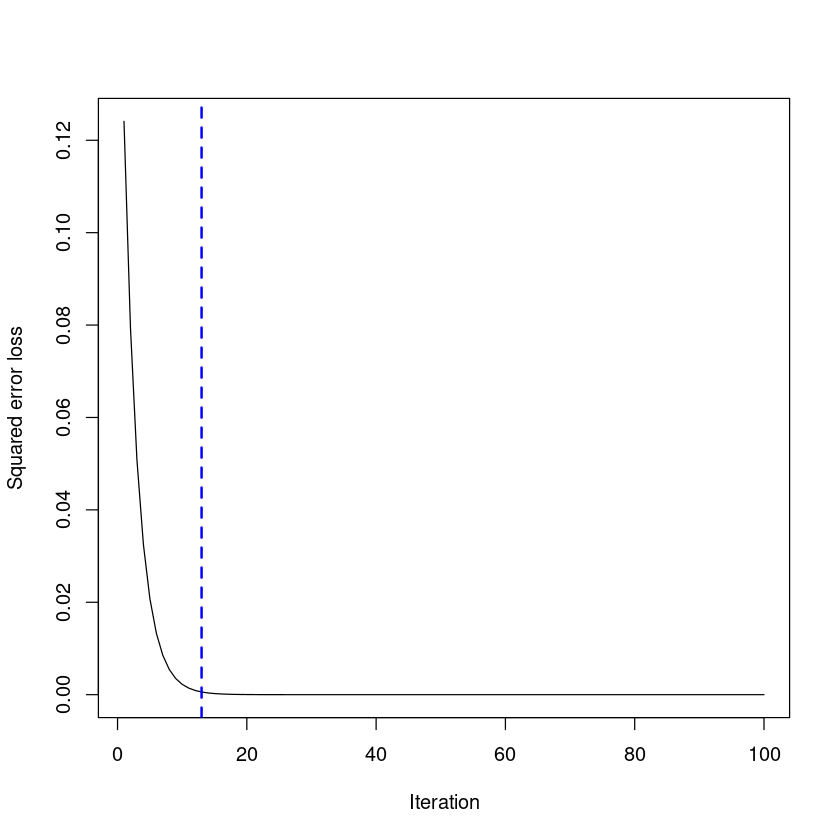

In [83]:
data_train <- as.data.frame(data_pd_train)
y=data_train$class


noftrees=10
depth=5
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=20
depth=5
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=100
depth=5
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=100
depth=5
learning_rate=0.5
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=100
depth=5
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=100
depth=10
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

d5. Gradient Boosted Tree (GBT) for digits Data Set

Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 1: V1 has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 40: V40 has no variation.”
OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



[1] 10
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 10 
Equivalent Number of Parameters: 3.84 
Residual Standard Error: 0.04836 


Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 1: V1 has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 40: V40 has no variation.”
OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



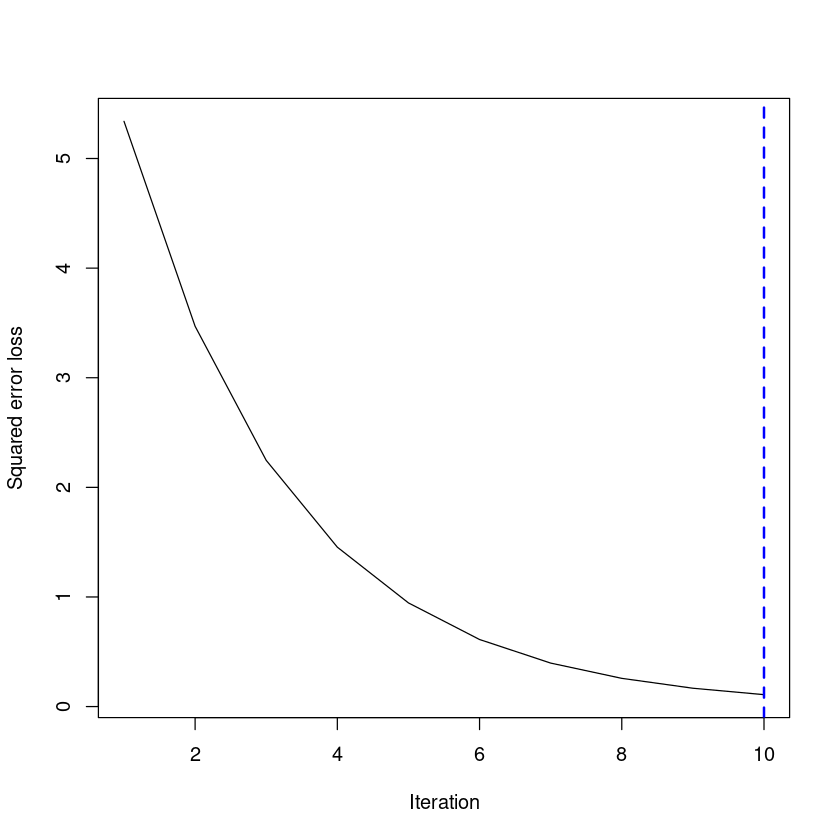

[1] 13
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 20 
Equivalent Number of Parameters: 3.73 
Residual Standard Error: 0.1585 


Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 1: V1 has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 40: V40 has no variation.”
OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



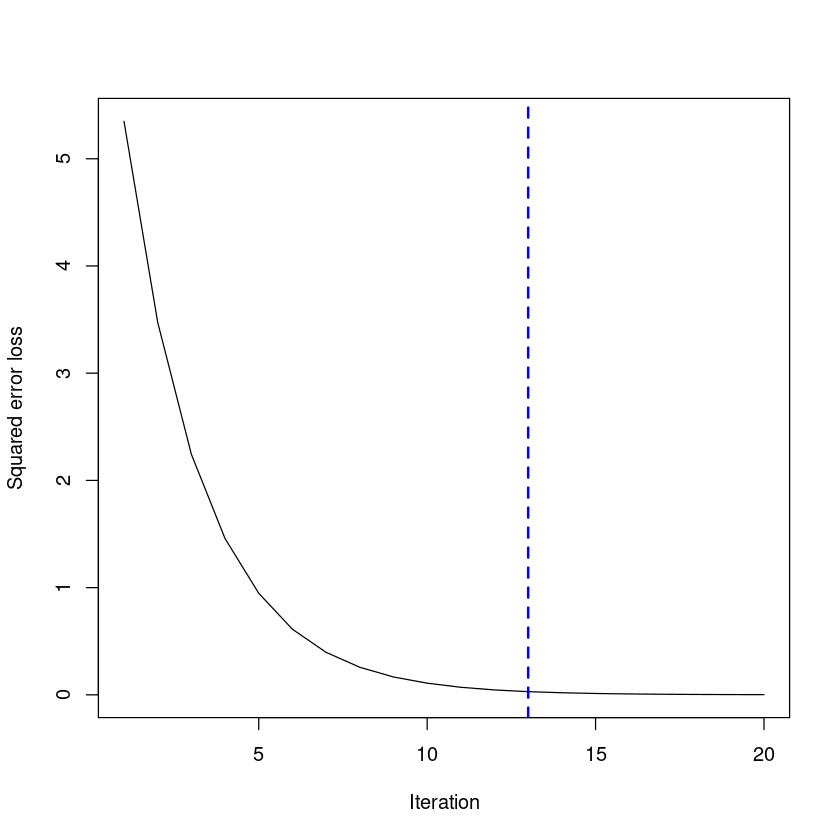

[1] 13
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.1564 


Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 1: V1 has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 40: V40 has no variation.”
OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



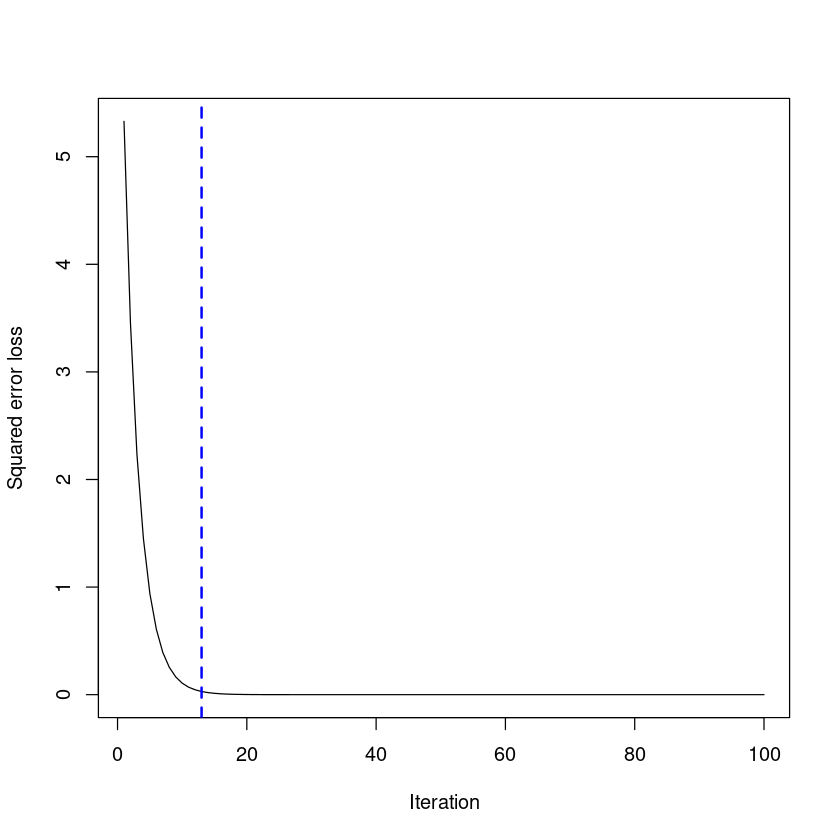

[1] 11
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.478 


Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 1: V1 has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 40: V40 has no variation.”
OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



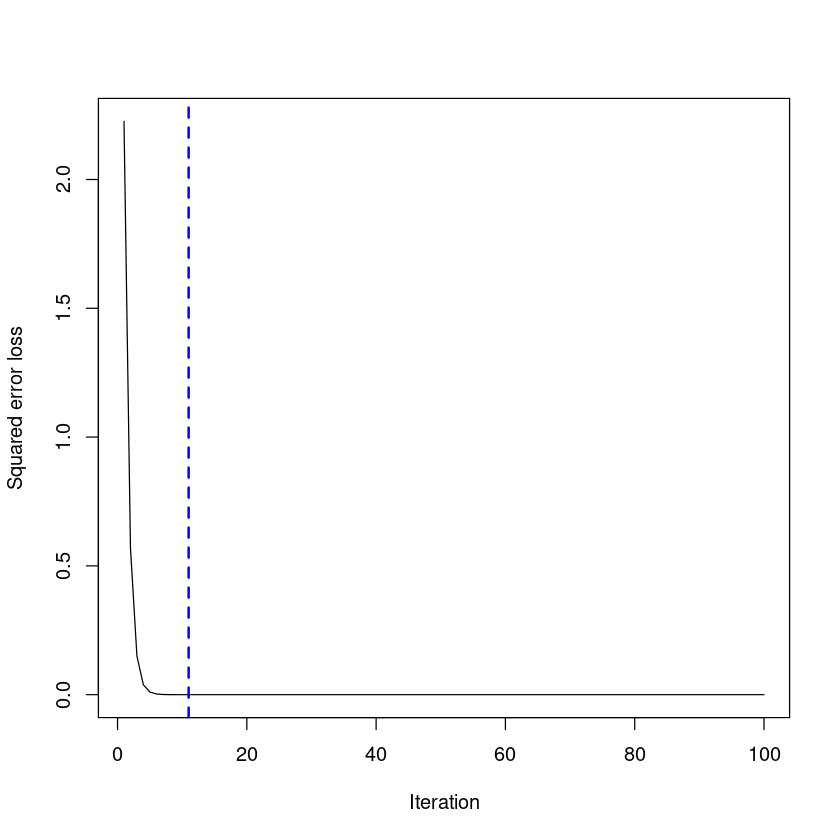

[1] 13
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.1572 


Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 1: V1 has no variation.”
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
“variable 40: V40 has no variation.”
OOB generally underestimates the optimal number of iterations although predictive performance is reasonably competitive. Using cv_folds>1 when calling gbm usually results in improved predictive performance.



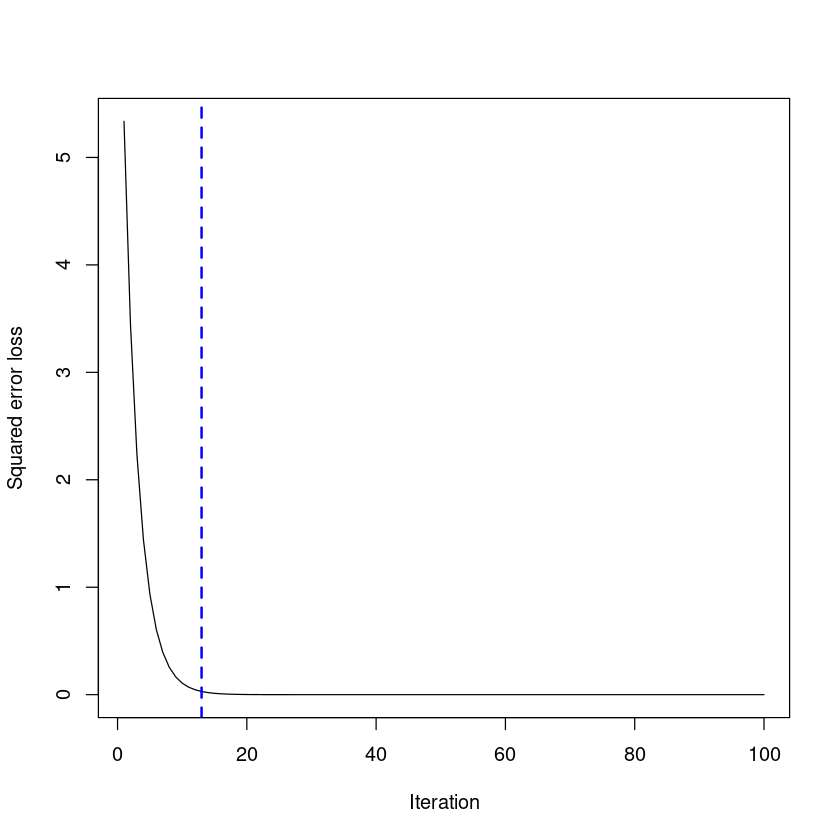

[1] 13
attr(,"smoother")
Call:
loess(formula = object$oobag.improve ~ x, enp.target = min(max(4, 
    length(x)/10), 50))

Number of Observations: 100 
Equivalent Number of Parameters: 8.32 
Residual Standard Error: 0.1616 


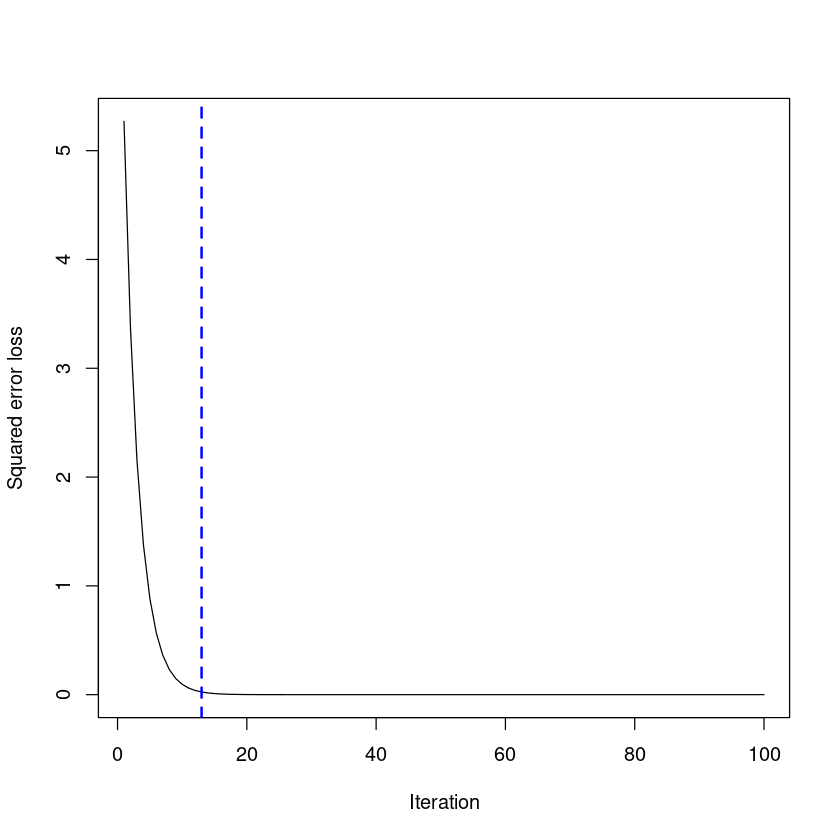

In [84]:
data_train <- as.data.frame(data_digits_train)
y=data_train$class


noftrees=10
depth=5
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=20
depth=5
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=100
depth=5
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=100
depth=5
learning_rate=0.5
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=100
depth=5
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)

noftrees=100
depth=10
learning_rate=0.2
sampling_fraction=0.5
model=gbm(y~., data=data_train,distribution = "gaussian", n.trees = noftrees,
        interaction.depth = depth, n.minobsinnode = 5, shrinkage =learning_rate ,
        bag.fraction = sampling_fraction)

best.iter <- gbm.perf(model, method = "OOB")
print(best.iter)